<a href="https://colab.research.google.com/github/Rohit-Saswadkar/Omdena-Tuberculosis-Analysis-in-Kaduna/blob/main/Omdena_Kaduna_Model_block_1a_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tuberculosis Analysis and Prediction Model Building for Kaduna, Nigeria**

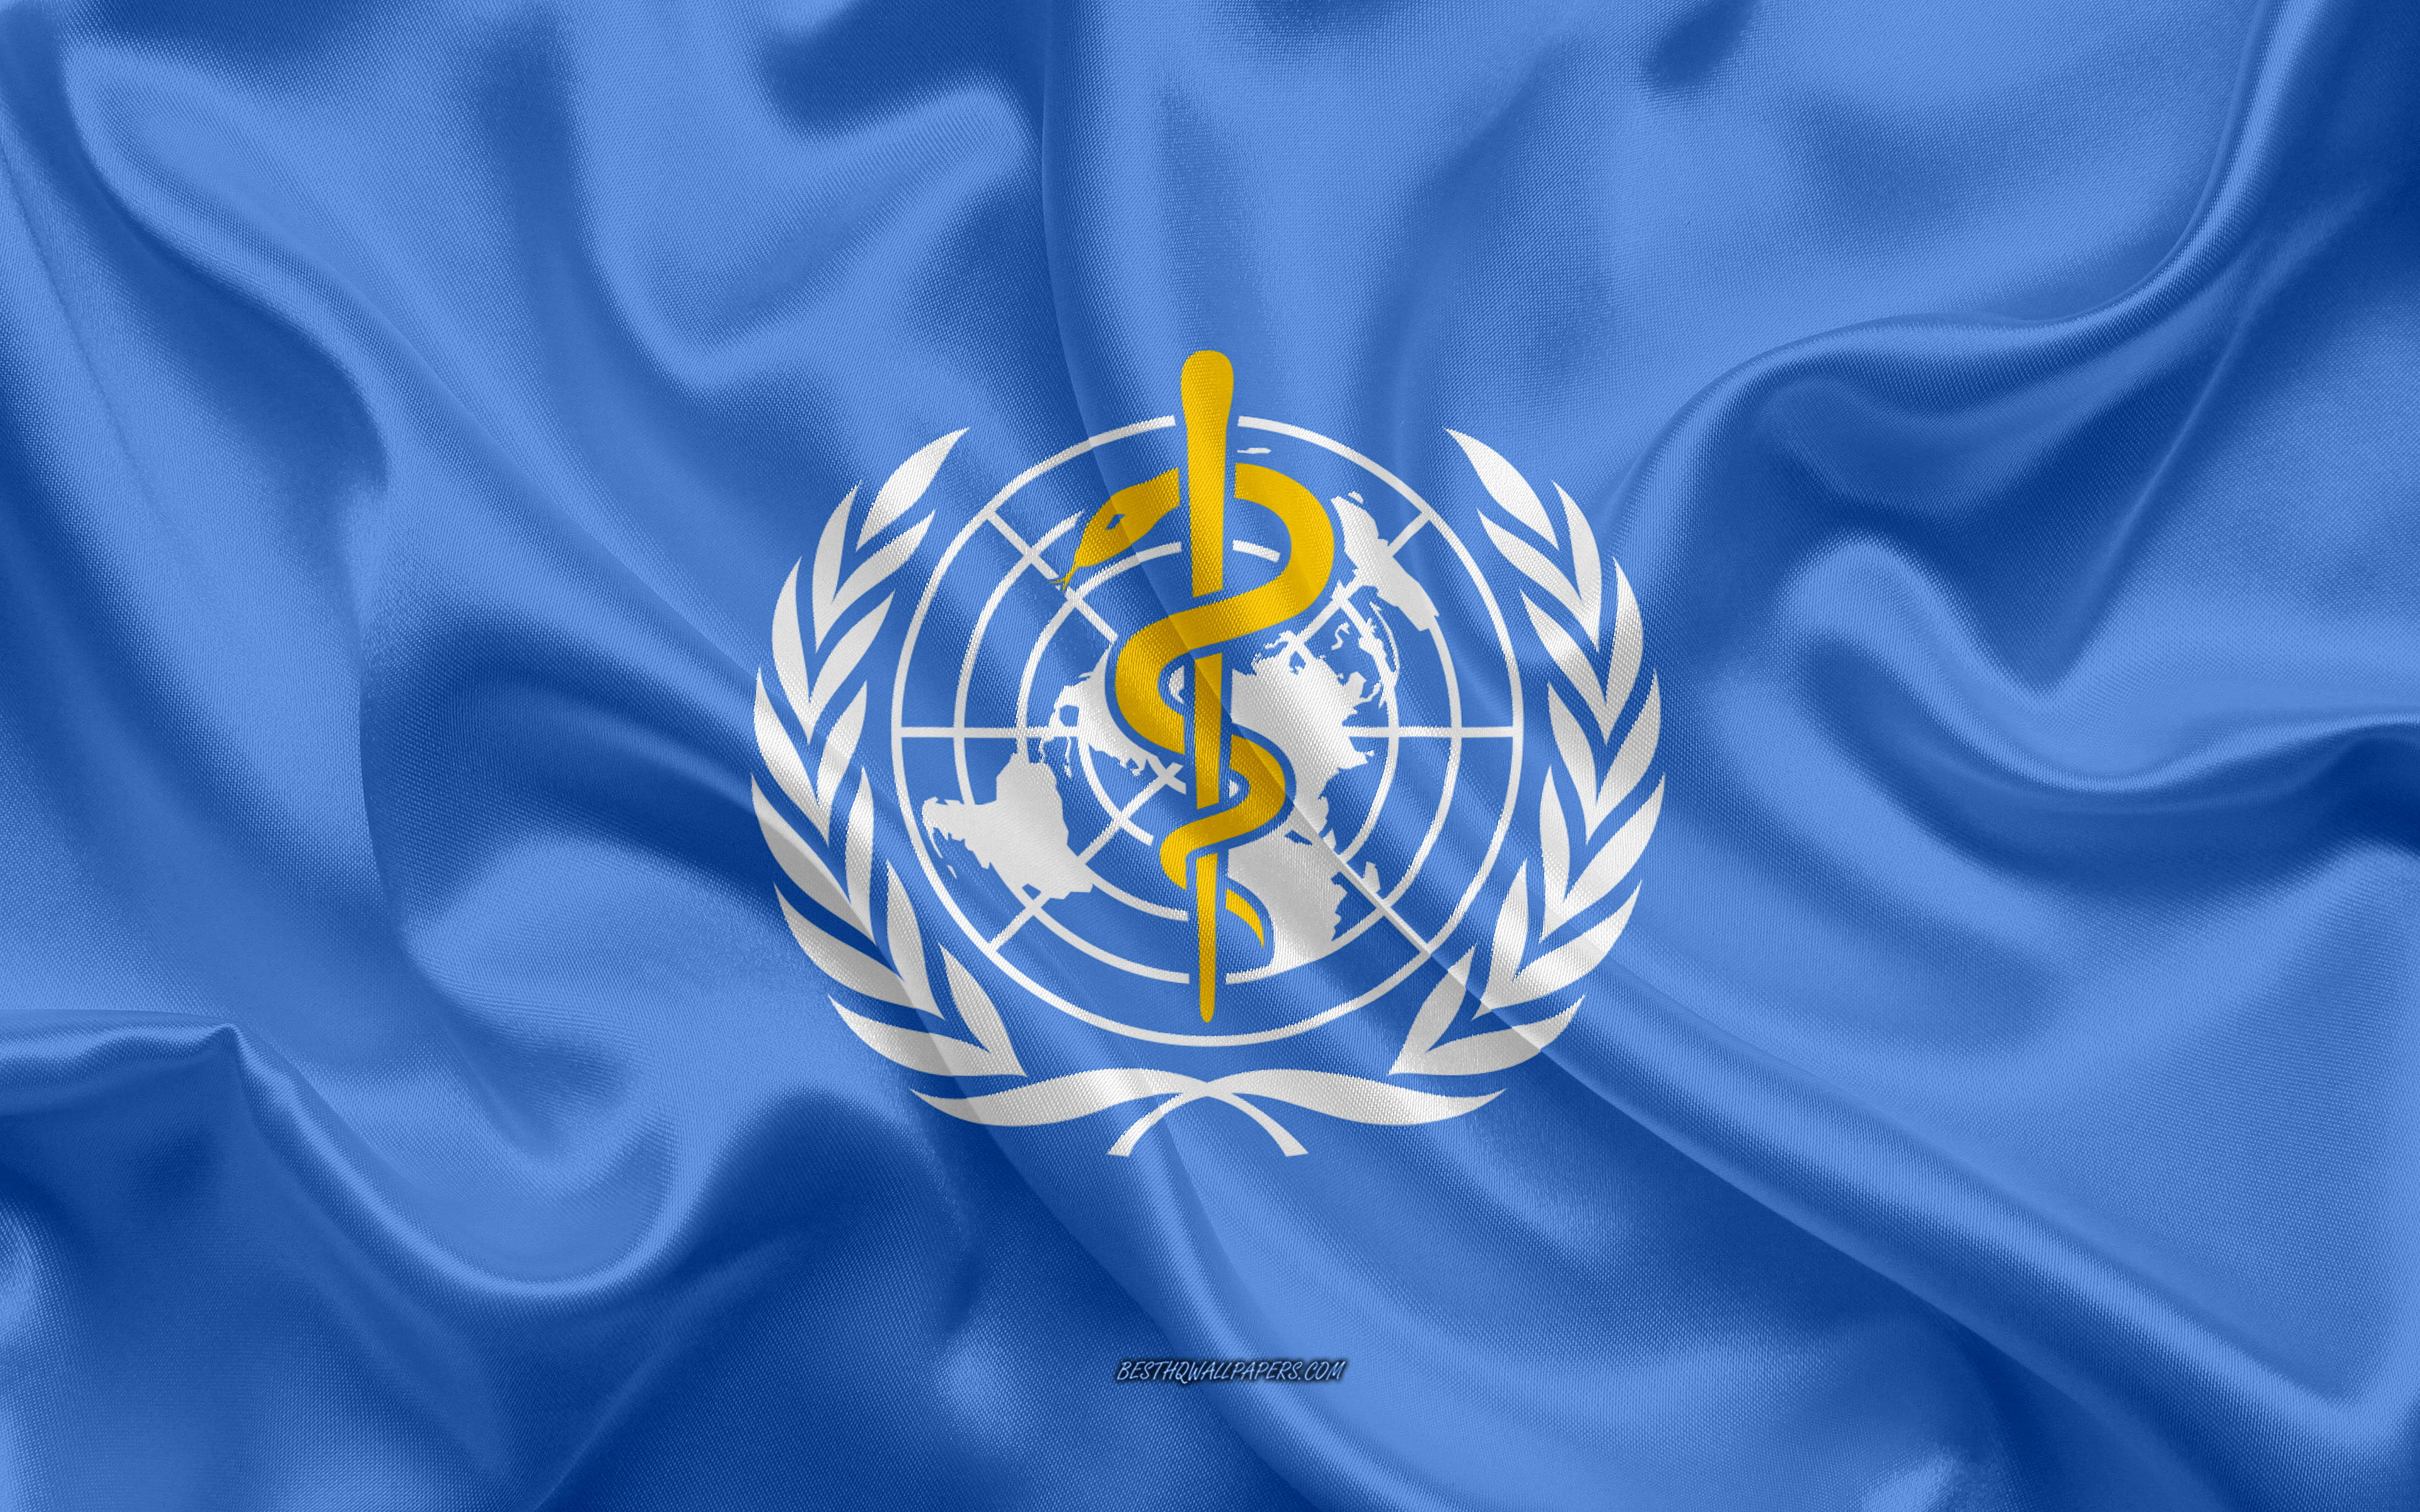

* Author - Rohit Saswadkar
* Linkedin - https://linkedin.com/in/rohit-saswadkar-595453237
* Github - https://github.com/Rohit-Saswadkar

**Problem:** Tuberculosis (TB) is a major public health concern in Nigeria, particularly in Kaduna. This project aims to analyze historical data and predict future TB cases in the region.

**Data:** I will use a dataset containing information on TB cases in Kaduna from 2019 to 2023, including details like total cases, drug resistance, HIV co-infection, and healthcare worker (HCW) cases.

**Methods:**

* **Data Exploration:** Analyze trends in TB cases over time, identify patterns, and clean/pre-process data.
* **Regression Modeling:** Develop and evaluate a regression model to predict future TB cases using the provided features. Explore various regression techniques during model selection.
* **Prediction and Insights:** Use the chosen model to predict future cases, identify influential factors within the existing features, and generate recommendations for TB control strategies.

**Tools:** Python, pandas, NumPy, scikit-learn (machine learning), Matplotlib/Seaborn (visualization).

**Timeline:** 4 weeks (data exploration, model selection, training/evaluation, prediction, reporting).

**Deliverables:**

* Project report outlining methodology, findings, and recommendations.
* Trained and documented regression model for future TB case prediction.
* Key visualizations summarizing data analysis and model performance.

This even more concise version removes the mention of feature engineering and specific model names while keeping the core elements of the project description.

##**1] Importing Libraries**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.ensemble import RandomForestRegressor

# get important ML libraries

from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error  ,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import Ridge , Lasso , ElasticNet
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , KFold
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump , load
import warnings
import pickle as pkl


##**2] Loading Dataset**

In [6]:
# load the data
path = '/content/drive/MyDrive/Omdena/My Contribution/Processed Data/block1a_processed.csv'
df = pd.read_csv(path)

In [7]:
df.shape

(460, 15)

In [8]:
df.describe()

Unnamed: 0         Year     Quarter  Total number of presumptives  \
count  460.000000   460.000000  460.000000                    460.000000   
mean   229.500000  2021.000000    2.500000                   1419.571739   
std    132.934821     1.415753    1.119251                   1825.665223   
min      0.000000  2019.000000    1.000000                      0.000000   
25%    114.750000  2020.000000    1.750000                    241.500000   
50%    229.500000  2021.000000    2.500000                    680.000000   
75%    344.250000  2022.000000    3.250000                   1719.750000   
max    459.000000  2023.000000    4.000000                  11513.000000   

       Presumptive DS-TB  Presumptive DR-TB  Examined for diagnosis  \
count         460.000000         460.000000              460.000000   
mean         1397.563043          22.008696             1410.784783   
std          1805.683310          77.104207             1815.147488   
min             0.000000           0.000000                0.000000   
25%           227.000000           0.000000              241.500000   
50%           671.000000           3.000000              675.500000   
75%          1687.000000          20.000000             1710.500000   
max         11349.000000        1198.000000            11513.000000   

       Total diagnosed  Rifampicin resistant  HIV positive  HIV negative  \
count       460.000000            460.000000    460.000000    460.000000   
mean        123.367391              0.573913     15.010870   1086.545652   
std         171.308656              1.445063     34.893393   1610.477967   
min           0.000000              0.000000      0.000000      0.000000   
25%          21.750000              0.000000      0.000000    107.250000   
50%          52.000000              0.000000      2.500000    376.000000   
75%         148.000000              0.000000     12.000000   1257.500000   
max        1022.000000             11.000000    309.000000   8346.000000   

       HIV unknown  Presumptives that are HCWs  
count   460.000000                  460.000000  
mean    318.015217                    0.602174  
std     980.175453                    8.132910  
min       0.000000                    0.000000  
25%       0.000000                    0.000000  
50%       0.000000                    0.000000  
75%     131.250000                    0.000000  
max    9373.000000                  169.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    460 non-null    int64 
 1   Year                          460 non-null    int64 
 2   Quarter                       460 non-null    int64 
 3   LGA                           460 non-null    object
 4   Total number of presumptives  460 non-null    int64 
 5   Presumptive DS-TB             460 non-null    int64 
 6   Presumptive DR-TB             460 non-null    int64 
 7   Examined for diagnosis        460 non-null    int64 
 8   Total diagnosed               460 non-null    int64 
 9   Rifampicin resistant          460 non-null    int64 
 10  HIV positive                  460 non-null    int64 
 11  HIV negative                  460 non-null    int64 
 12  HIV unknown                   460 non-null    int64 
 13  Presumptives that ar

##**3] Lets check values of the data**

In [10]:
def uniques():
  for col in df.columns:
    print(df[col].nunique())
uniques()

460
5
4
23
386
385
81
385
212
11
72
353
140
10
20


In [11]:
# get uniques of lga
df['LGA'].value_counts()

Birnin-Gwari    20
Kaura           20
Zango-Kataf     20
Soba            20
Sanga           20
Sabon-Gari      20
Markafi         20
Lere            20
Kudan           20
Kubau           20
Kauru           20
Kajuru          20
Chikun          20
Kagarko         20
Kaduna South    20
Kaduna North    20
Kachia          20
Jema'a          20
Jaba            20
Ikara           20
Igabi           20
Giwa            20
Zaria           20
Name: LGA, dtype: int64

In [12]:
df['Year_Quarter'].value_counts()

2019 Q1    23
2019 Q2    23
2023 Q3    23
2023 Q2    23
2023 Q1    23
2022 Q4    23
2022 Q3    23
2022 Q2    23
2022 Q1    23
2021 Q4    23
2021 Q3    23
2021 Q2    23
2021 Q1    23
2020 Q4    23
2020 Q3    23
2020 Q2    23
2020 Q1    23
2019 Q4    23
2019 Q3    23
2023 Q4    23
Name: Year_Quarter, dtype: int64

In [13]:
df['Presumptive DR-TB'].value_counts()

0      193
1       20
3       18
5       14
2       13
      ... 
108      1
349      1
46       1
633      1
55       1
Name: Presumptive DR-TB, Length: 81, dtype: int64

In [14]:
df['Year_Quarter']

0      2019 Q1
1      2019 Q1
2      2019 Q1
3      2019 Q1
4      2019 Q1
        ...   
455    2023 Q4
456    2023 Q1
457    2023 Q2
458    2023 Q3
459    2023 Q4
Name: Year_Quarter, Length: 460, dtype: object

In [15]:
# LGA are in upper and lower case so replace them with upper
df['LGA'] = df['LGA'].str.upper()
df['LGA'].nunique()

23

In [16]:
# shows entire data without skipping
pd.reset_option('display.max_rows',None)
pd.reset_option('display.max_columns',None)

In [17]:
df

Unnamed: 0  Year  Quarter           LGA  Total number of presumptives  \
0             0  2019        1  BIRNIN-GWARI                            58   
1             1  2019        1        CHIKUN                           346   
2             2  2019        1          GIWA                           201   
3             3  2019        1         IGABI                           261   
4             4  2019        1         IKARA                           209   
..          ...   ...      ...           ...                           ...   
455         455  2023        4   ZANGO-KATAF                             0   
456         456  2023        1         ZARIA                          5668   
457         457  2023        2         ZARIA                          7299   
458         458  2023        3         ZARIA                             0   
459         459  2023        4         ZARIA                             0   

     Presumptive DS-TB  Presumptive DR-TB  Examined for diagnosis  \
0                   58                  0                      58   
1                  306                 40                     322   
2                  201                  0                     201   
3                  251                 10                     261   
4                  205                  4                     209   
..                 ...                ...                     ...   
455                  0                  0                       0   
456               5668                  0                    5615   
457               7244                 55                    7244   
458                  0                  0                       0   
459                  0                  0                       0   

     Total diagnosed  Rifampicin resistant  HIV positive  HIV negative  \
0                 25                     0             2            56   
1                 66                     0            99           222   
2                 38                     1            16           185   
3                 70                     3            10           251   
4                 13                     0             5           204   
..               ...                   ...           ...           ...   
455                0                     0             0             0   
456              767                     0             9          5659   
457              805                     4            10          7289   
458                0                     0             0             0   
459                0                     0             0             0   

     HIV unknown  Presumptives that are HCWs Year_Quarter  
0              0                           0      2019 Q1  
1             25                           0      2019 Q1  
2              0                           0      2019 Q1  
3              0                           0      2019 Q1  
4              0                           0      2019 Q1  
..           ...                         ...          ...  
455            0                           0      2023 Q4  
456            0                           0      2023 Q1  
457            0                           0      2023 Q2  
458            0                           0      2023 Q3  
459            0                           0      2023 Q4  

[460 rows x 15 columns]

**Challenge: I have only 460 rows of data**

**Presumptive DR TB has object vaue as True then replace with 1**

In [18]:
# Replace TRUE to 1 all over the df as its typing mistake
# convert the numeric string columns to numeric format
df.replace('TRUE' , 1 , inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    460 non-null    int64 
 1   Year                          460 non-null    int64 
 2   Quarter                       460 non-null    int64 
 3   LGA                           460 non-null    object
 4   Total number of presumptives  460 non-null    int64 
 5   Presumptive DS-TB             460 non-null    int64 
 6   Presumptive DR-TB             460 non-null    int64 
 7   Examined for diagnosis        460 non-null    int64 
 8   Total diagnosed               460 non-null    int64 
 9   Rifampicin resistant          460 non-null    int64 
 10  HIV positive                  460 non-null    int64 
 11  HIV negative                  460 non-null    int64 
 12  HIV unknown                   460 non-null    int64 
 13  Presumptives that ar

**Are there any null values?**

In [20]:
# check null counts
df.isnull().sum()

Unnamed: 0                      0
Year                            0
Quarter                         0
LGA                             0
Total number of presumptives    0
Presumptive DS-TB               0
Presumptive DR-TB               0
Examined for diagnosis          0
Total diagnosed                 0
Rifampicin resistant            0
HIV positive                    0
HIV negative                    0
HIV unknown                     0
Presumptives that are HCWs      0
Year_Quarter                    0
dtype: int64

In [21]:
# There is unnecessary column as Unnamed so droped it.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df.duplicated().sum()

0



## **Conclusion as per above:** 🔎

**460 individuals** were flagged as potential TB cases (presumptive) in the first quarter of 2019 to Second quarter of 2023. Encouragingly, all underwent diagnostic procedures.

**Diagnosis Breakdown:**

* **100% confirmed TB:** All 460 presumptive cases were diagnosed with tuberculosis.

**HIV Status:**

* **Positive:** 123 diagnosed cases were HIV positive.
* **Negative:** 109 diagnosed cases were HIV negative.
* **Unknown:** The HIV status of 15 diagnosed cases remains unknown.

**Important Note:**

While it provides a snapshot of TB cases during that period,  **more data** across different quarters and years would be necessary to identify trends, understand seasonal variations, and for more comprehensive analysis.

**Additional Insights (if data is available):**

* It would be valuable to calculate the percentage of presumptive cases diagnosed with specific TB types (e.g., drug-resistant TB).
* Examining the number of healthcare workers (HCWs) among the presumptive cases could provide insights into potential workplace exposure risks.

This revised summary offers a clearer picture of the TB situation in Q1 2021, acknowledges the limitations of single-period data, and suggests further analysis with additional information.

##**4] Let's Explore the Data**

**Separate the data as per there data types**

In [23]:
num_cols = list(df.select_dtypes(include=['float','int']).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)
len(num_cols) , len(categorical_cols)

(12, 2)

In [24]:
df.columns

Index(['Year', 'Quarter', 'LGA', 'Total number of presumptives',
       'Presumptive DS-TB', 'Presumptive DR-TB', 'Examined for diagnosis',
       'Total diagnosed', 'Rifampicin resistant', 'HIV positive',
       'HIV negative', 'HIV unknown', 'Presumptives that are HCWs',
       'Year_Quarter'],
      dtype='object')

In [25]:
num_cols

['Year',
 'Quarter',
 'Total number of presumptives',
 'Presumptive DS-TB',
 'Presumptive DR-TB',
 'Examined for diagnosis',
 'Total diagnosed',
 'Rifampicin resistant',
 'HIV positive',
 'HIV negative',
 'HIV unknown',
 'Presumptives that are HCWs']

###**A] Univariate Analysis**

**1] Let's check distribution of the data**

In [26]:
num_cols_distribution = [col for col in num_cols if col not in ['Year','Quarter']]

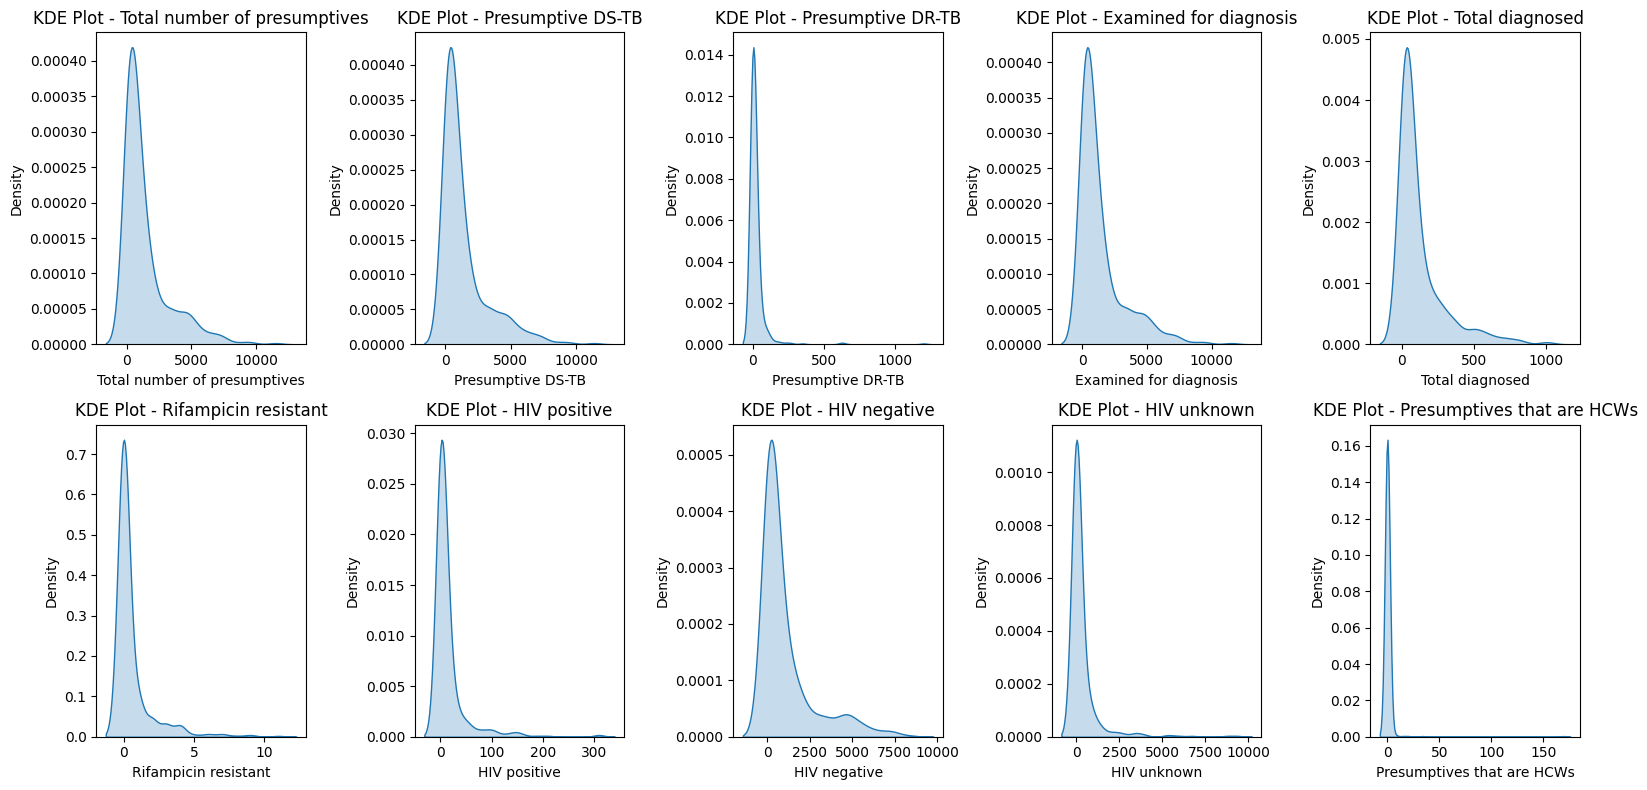

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_plots(df, num_cols):
    plt.figure(figsize=(16, 8))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(2, len(num_cols)//2, i)
        sns.kdeplot(df[col], fill=True)
        plt.title(f'KDE Plot - {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Assuming 'df' is your DataFrame and 'num_cols' is the list of numerical columns
plot_kde_plots(df, num_cols_distribution)

**Check skewness of the data**

In [28]:
df.skew()

<ipython-input-28-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Year                             0.000000
Quarter                          0.000000
Total number of presumptives     2.062898
Presumptive DS-TB                2.063071
Presumptive DR-TB               10.301236
Examined for diagnosis           2.069268
Total diagnosed                  2.348757
Rifampicin resistant             3.556632
HIV positive                     4.585315
HIV negative                     2.099334
HIV unknown                      5.517681
Presumptives that are HCWs      19.621296
dtype: float64

**Outliers are also affects the skewness of the data**


**2] Boxplots to check outliers**

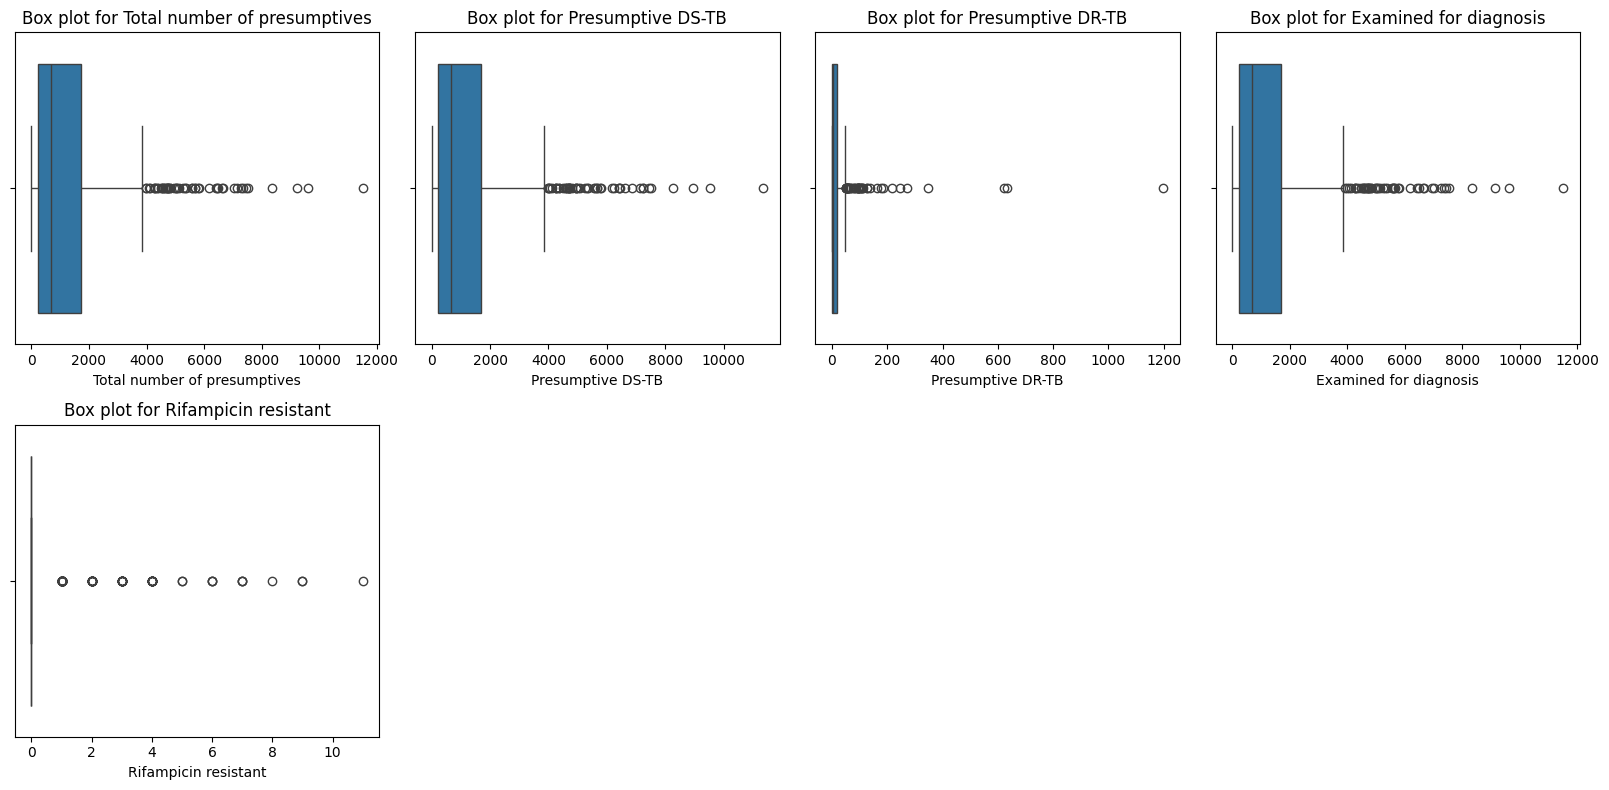

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_columns= ['Total number of presumptives' , 'Presumptive DS-TB' , 'Presumptive DR-TB','Examined for diagnosis','Rifampicin resistant']

# Create box plots for numeric columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()


**As per above, there are lots of outliers in our data. But due to limited data instead of removing them I am going to handle them**

In [30]:
for col in num_cols:
  df[col] , _ = boxcox( df[col] + 1)

In [31]:
df.skew()

<ipython-input-31-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Year                           -0.000215
Quarter                        -0.105973
Total number of presumptives   -0.123599
Presumptive DS-TB              -0.122279
Presumptive DR-TB               0.213782
Examined for diagnosis         -0.123752
Total diagnosed                -0.026527
Rifampicin resistant            1.337367
HIV positive                    0.170198
HIV negative                   -0.119247
HIV unknown                     0.837668
Presumptives that are HCWs      4.491876
dtype: float64

**After using BoxCox the skewness of Numerical data is around the zero.**

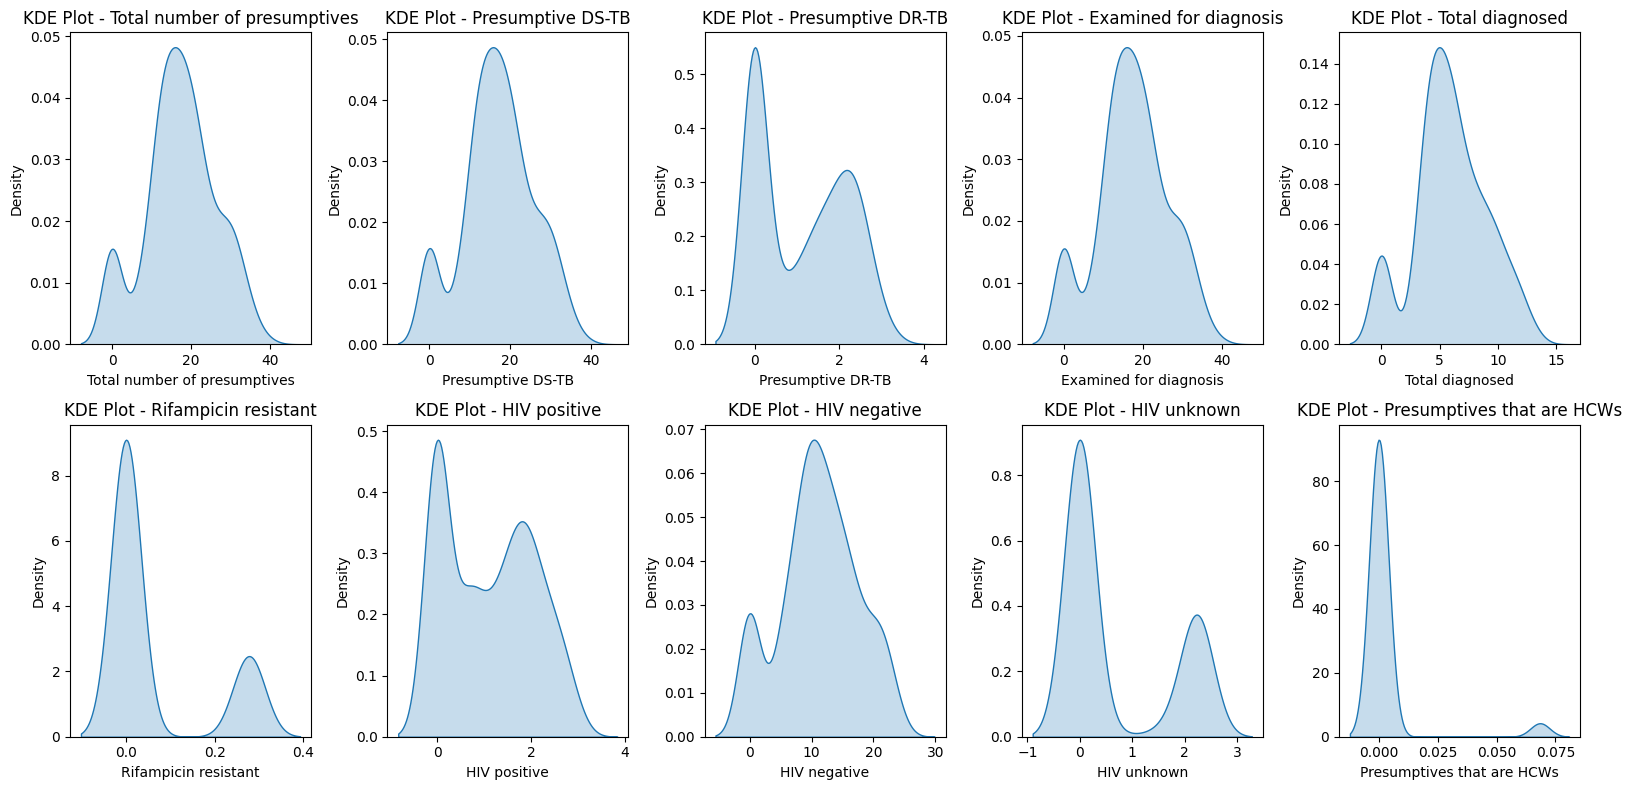

In [32]:
plot_kde_plots(df , num_cols_distribution)

###**B] Bivariate Analysis**

**1] Annual Trends in HIV Cases and Healthcare Worker Infections: Insights into Total Diagnosed Cases**

In [33]:
hiv_pos_each_year = df.groupby(['Year_Quarter'])['Total number of presumptives','Examined for diagnosis','Total diagnosed','HIV positive','Presumptives that are HCWs'].sum().reset_index()
hiv_pos_each_year

<ipython-input-33-c475da516da6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hiv_pos_each_year = df.groupby(['Year_Quarter'])['Total number of presumptives','Examined for diagnosis','Total diagnosed','HIV positive','Presumptives that are HCWs'].sum().reset_index()


Year_Quarter  Total number of presumptives  Examined for diagnosis  \
0       2019 Q1                    261.942796              261.376504   
1       2019 Q2                    257.388126              255.218735   
2       2019 Q3                    331.521137              329.309694   
3       2019 Q4                    340.715234              339.958504   
4       2020 Q1                    319.468807              318.009012   
5       2020 Q2                    328.256348              327.014890   
6       2020 Q3                    403.259637              402.776953   
7       2020 Q4                    445.712606              443.543963   
8       2021 Q1                    423.281533              422.488048   
9       2021 Q2                    460.194270              459.526573   
10      2021 Q3                    468.120246              465.783699   
11      2021 Q4                    508.297369              507.609792   
12      2022 Q1                    519.628274              518.908137   
13      2022 Q2                    509.944252              509.247685   
14      2022 Q3                    580.685376              579.791292   
15      2022 Q4                    586.776342              585.886101   
16      2023 Q1                    590.266008              587.671040   
17      2023 Q2                    609.763731              603.925264   
18      2023 Q3                      0.000000                0.000000   
19      2023 Q4                      0.000000                0.000000   

    Total diagnosed  HIV positive  Presumptives that are HCWs  
0        110.101653     31.823839                    0.068486  
1        111.942550     29.202198                    0.068483  
2        115.067955     23.886497                    0.068483  
3        118.581006     32.109011                    0.000000  
4        119.160719     27.349789                    0.068483  
5        114.392094     27.883557                    0.136966  
6        125.850978     25.283184                    0.205455  
7        138.487002     27.829316                    0.068486  
8        140.155962     24.852502                    0.000000  
9        150.355182     23.326428                    0.136969  
10       154.158415     28.379091                    0.068486  
11       167.336603     29.157371                    0.136969  
12       175.555424     24.459553                    0.000000  
13       175.848317     28.037222                    0.136969  
14       191.452525     26.224220                    0.068486  
15       205.363051     31.164005                    0.068486  
16       205.012536     31.563919                    0.000000  
17       211.034440     33.654168                    0.068483  
18         0.000000      0.000000                    0.000000  
19         0.000000      0.000000                    0.000000

**Conclusion**
* In the given dataset, I observed trends in the total number of presumptives, examinations for diagnosis, total diagnosed cases, HIV-positive cases, and the number of presumptives that are healthcare workers (HCWs) across different quarters from 2019 to 2023. Here are some key points:

1. The total number of presumptives and examinations for diagnosis generally increased over the quarters, reaching higher values in 2022 and 2023.

2. The total diagnosed cases showed an increasing trend, with significant spikes in 2021 Q4 and 2022 Q4.

3. The count of HIV-positive cases fluctuated over the quarters, with notable peaks in 2022 Q2 and 2022 Q4.

4. The number of presumptives that are healthcare workers (HCWs) varied across quarters, with higher counts observed in 2020 Q3, 2021 Q4, and 2022 Q2.

5. There are no data available for 2023 Q3 and Q4.

Overall, the dataset reflects dynamic patterns in the healthcare-related variables over time, suggesting potential trends and areas that may require further investigation.

**Lets Visualize the data**

**2] Total TB diagnosed cases by year in Kaduna Region**

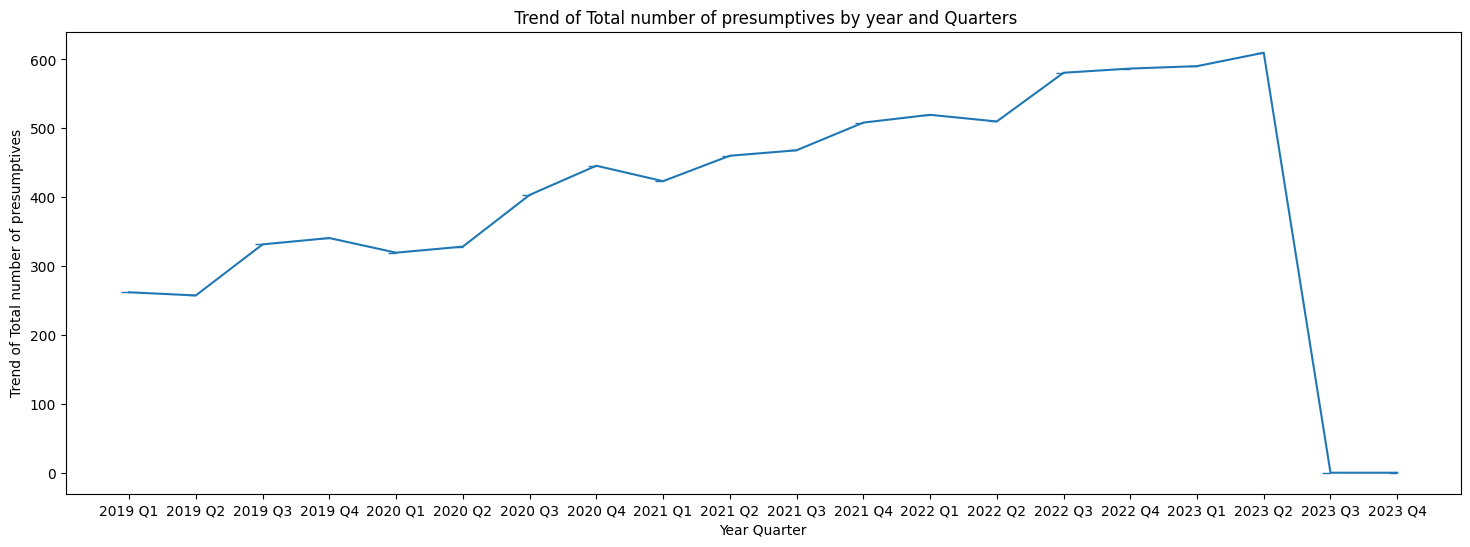

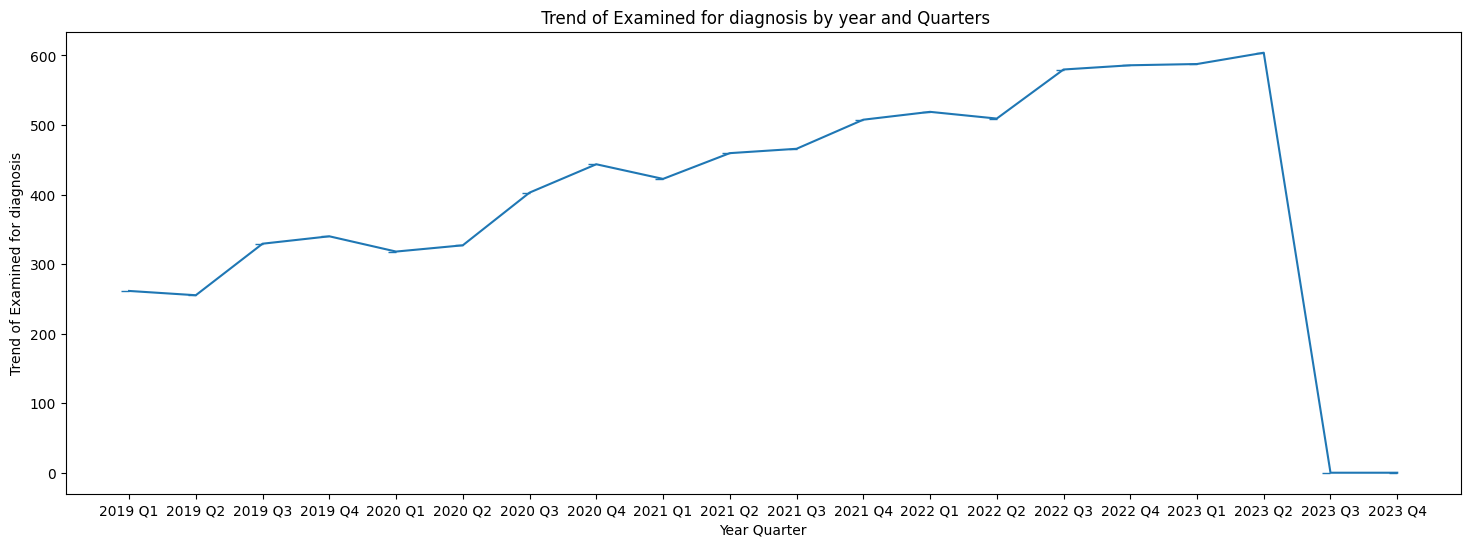

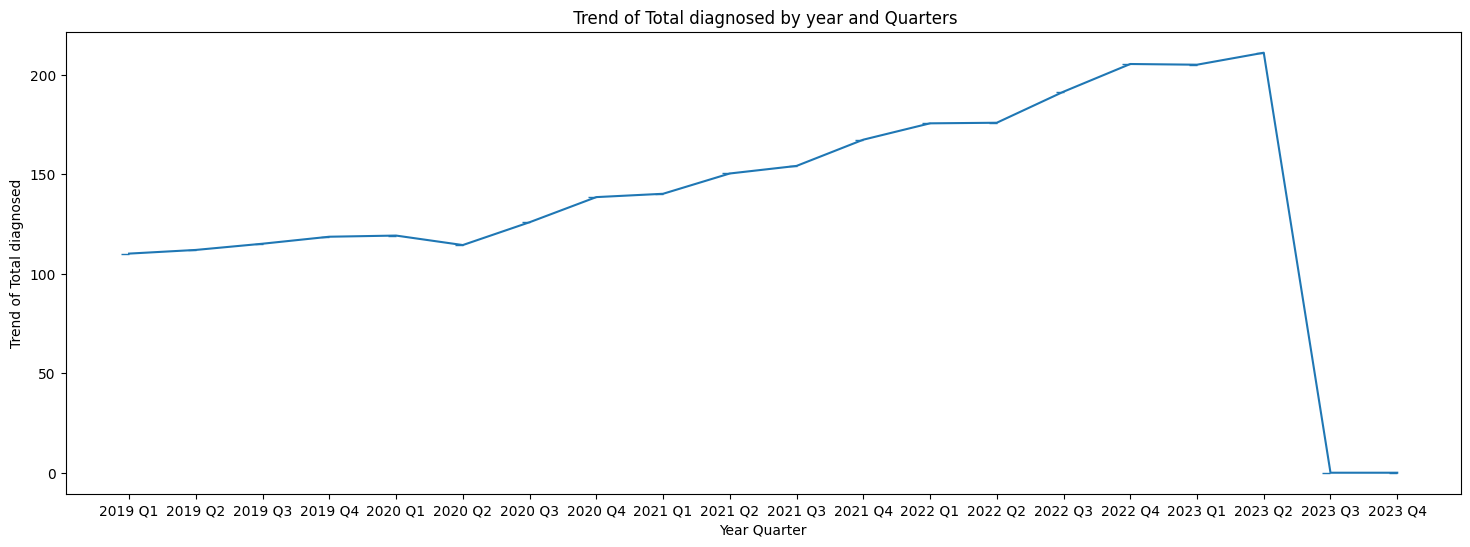

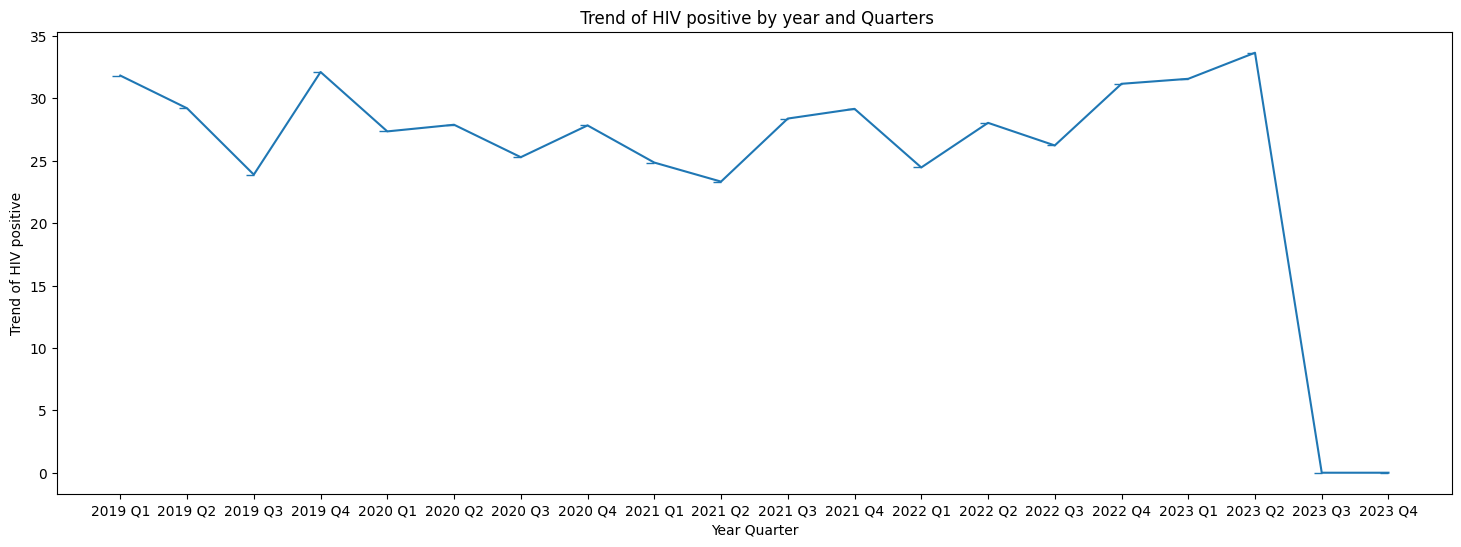

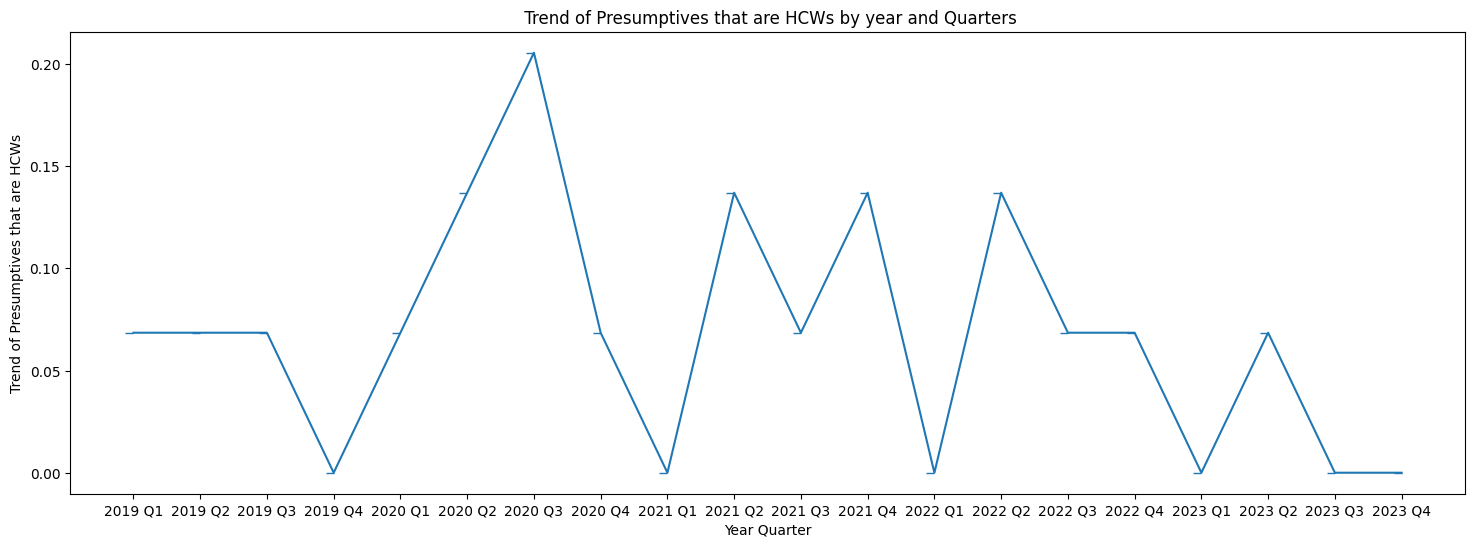

In [34]:
for col in [col for col in hiv_pos_each_year if col != 'Year_Quarter']:
  plt.figure(figsize=(18,6))
  plt.plot(hiv_pos_each_year['Year_Quarter'].astype(str),hiv_pos_each_year[col],marker = 0,linestyle='-')
  plt.title(f" Trend of {col} by year and Quarters")
  plt.ylabel(f"Trend of {col}")
  plt.xlabel('Year Quarter')
  # plt.grid(True)
  plt.show()

**3] Analyse the numbers of cases in each LGA**

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


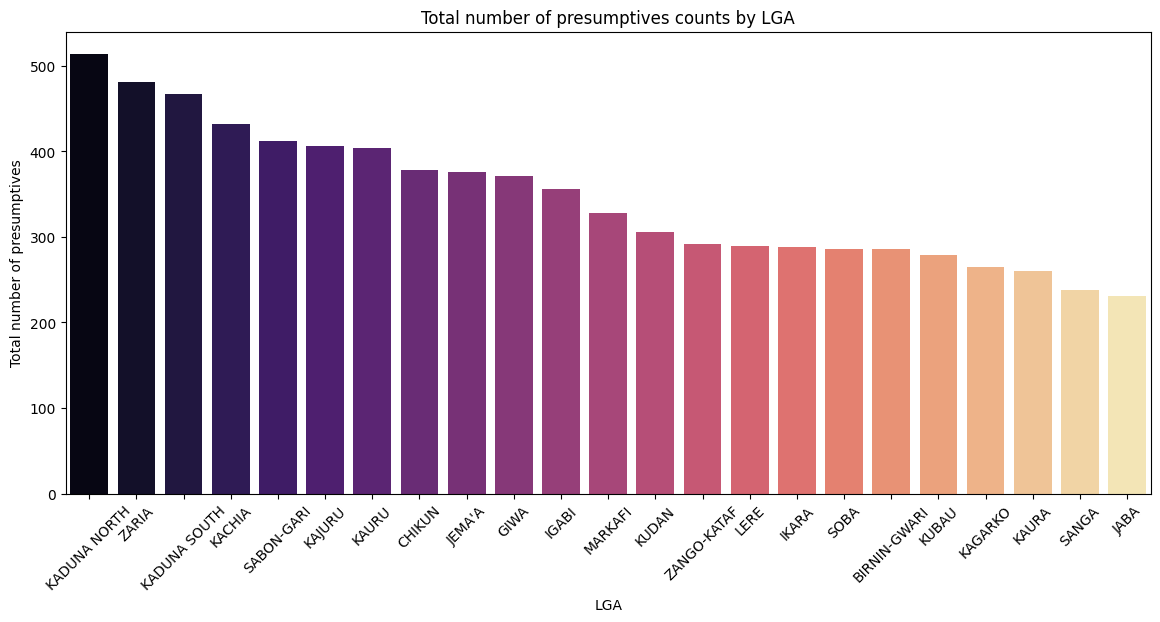

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


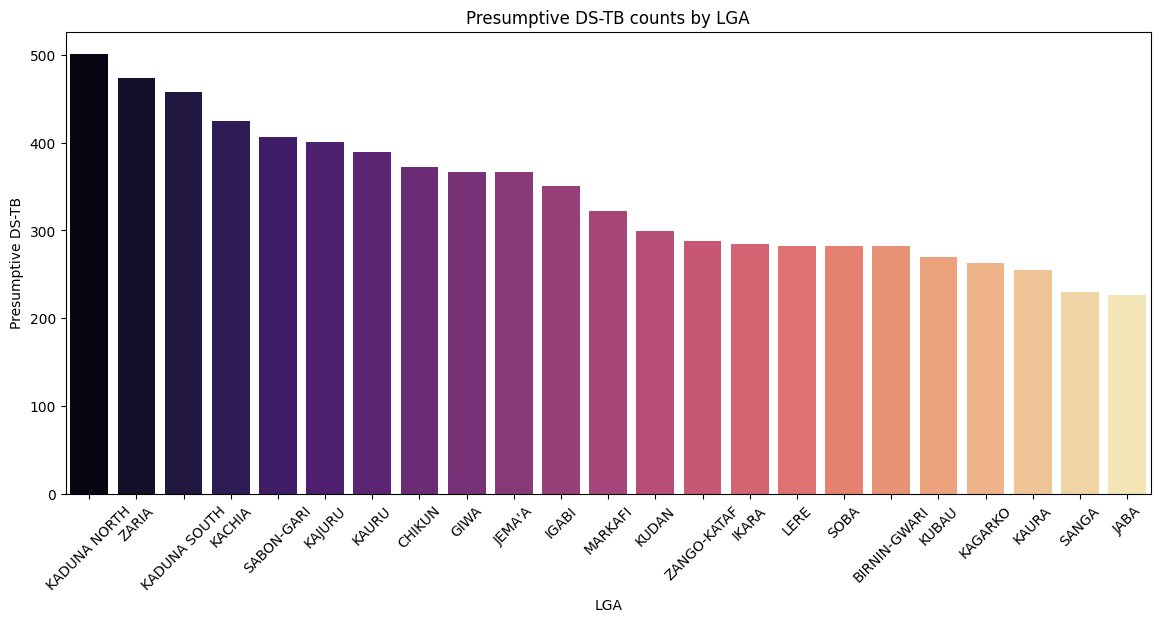

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


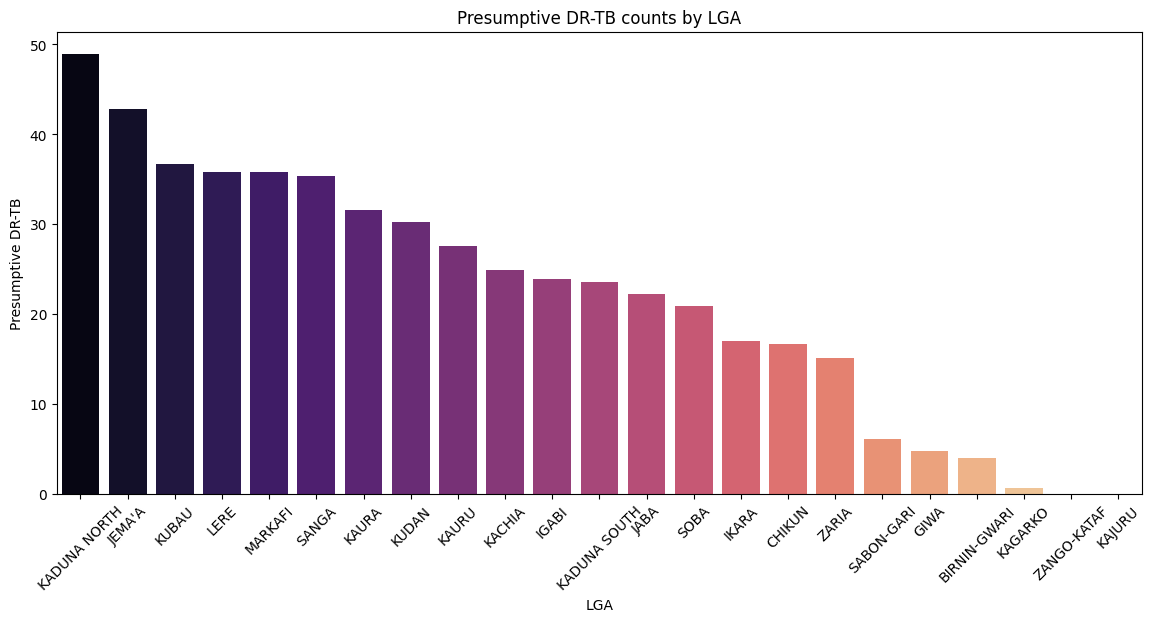

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


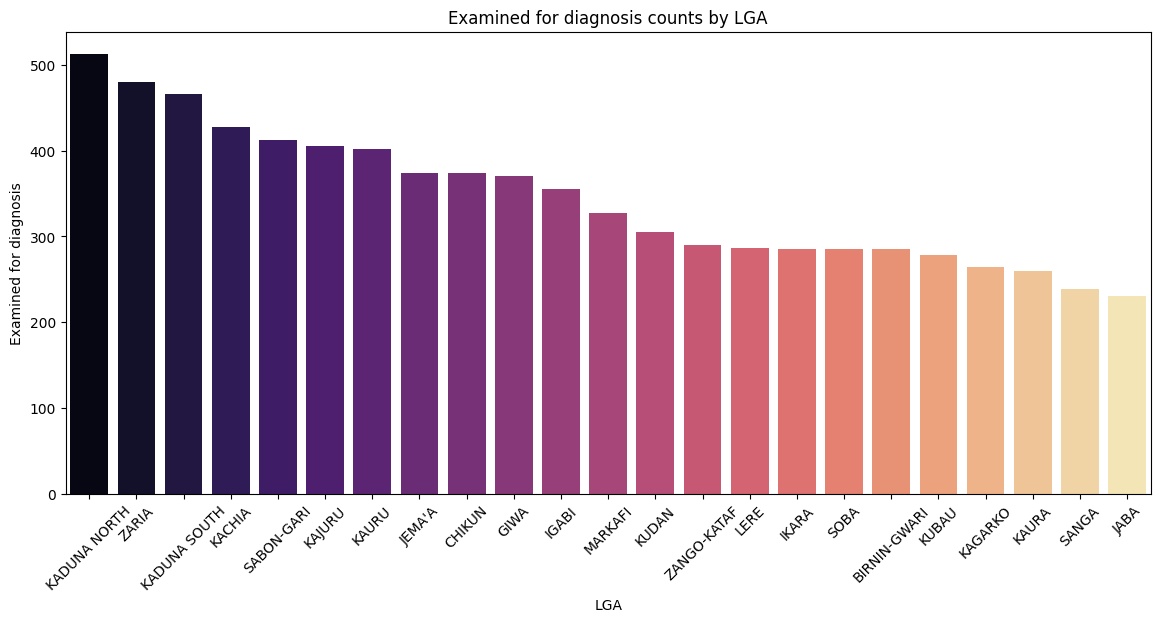

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


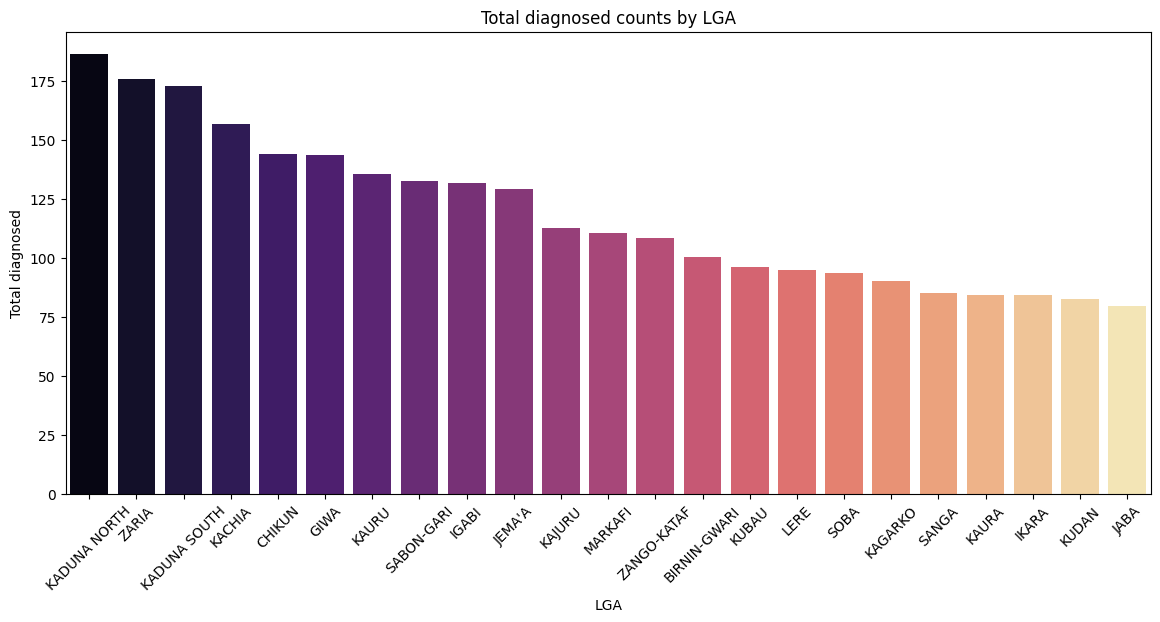

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


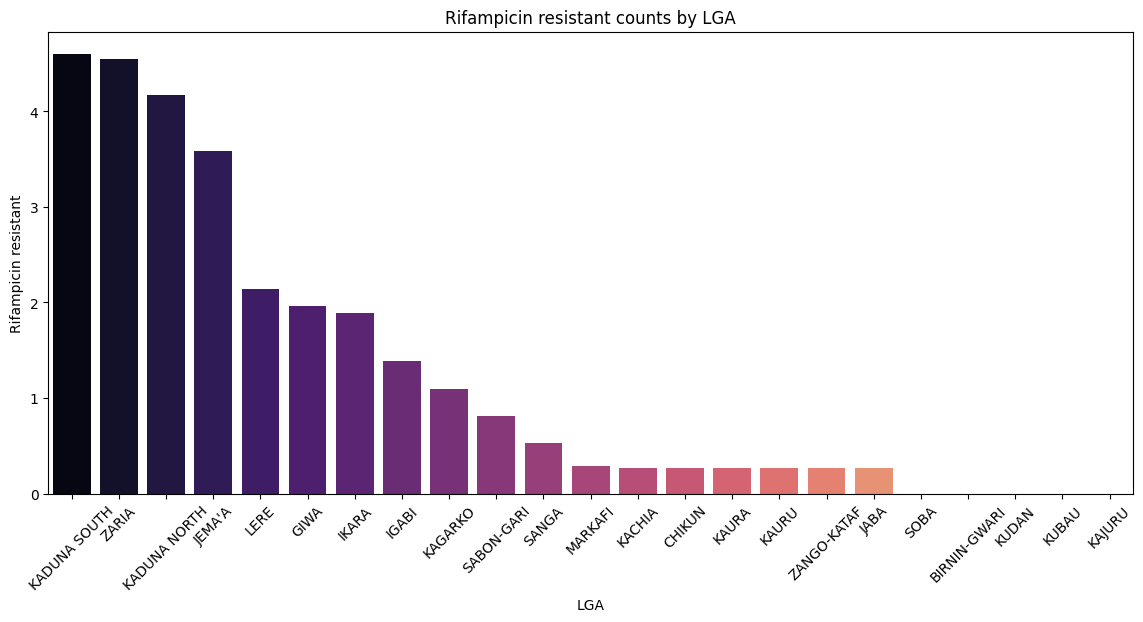

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


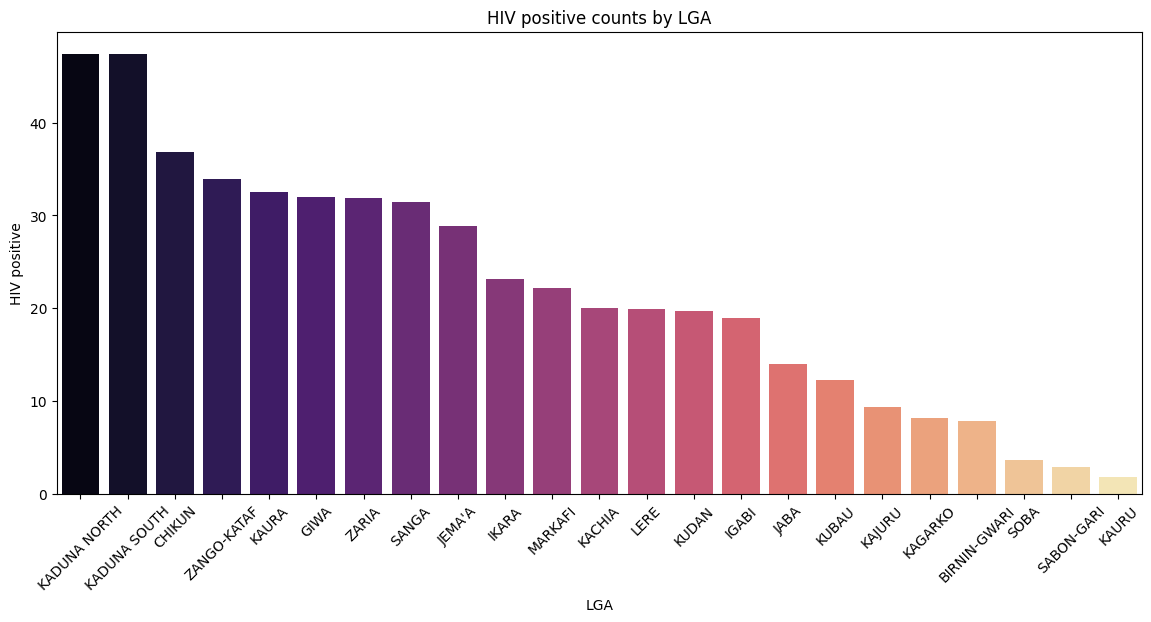

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


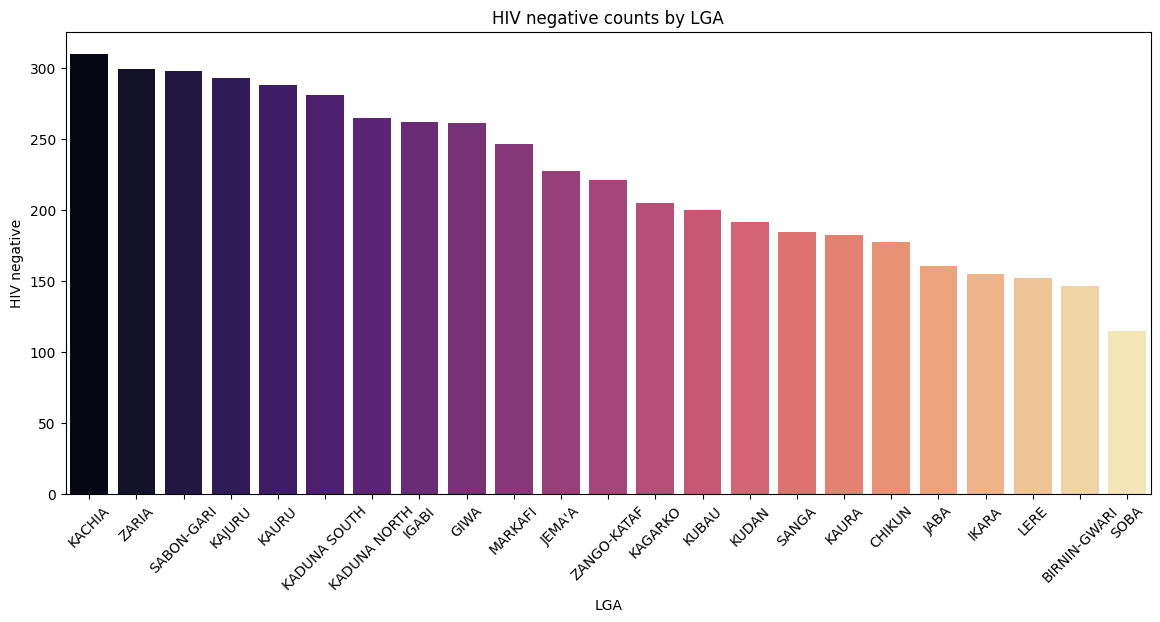

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


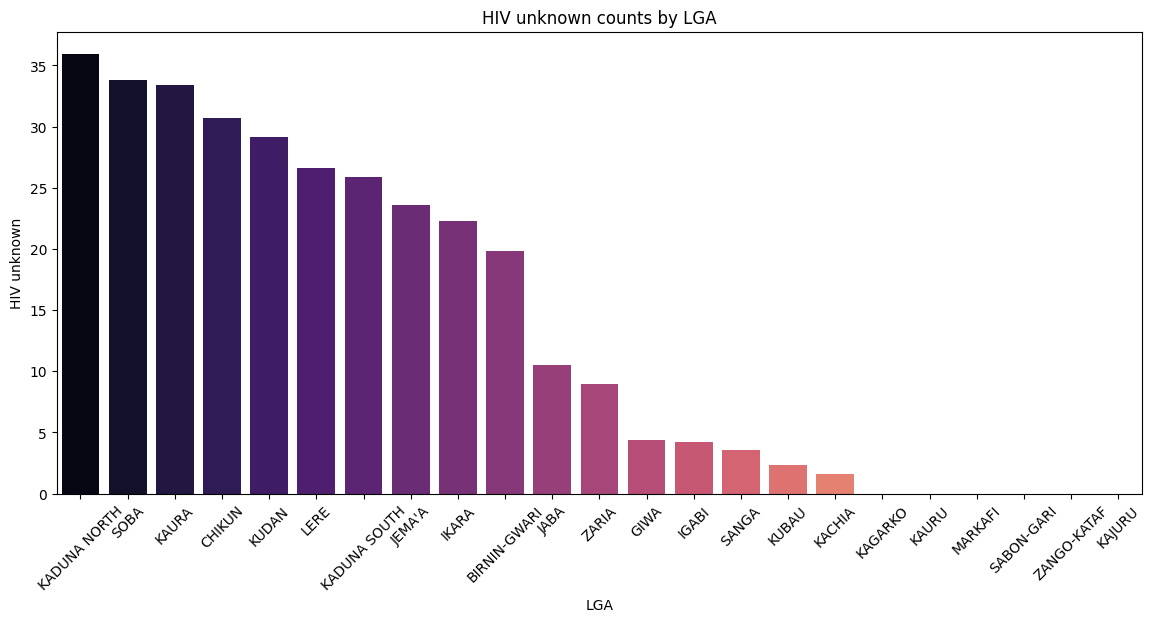

<ipython-input-35-4ca87d01a186>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
<ipython-input-35-4ca87d01a186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )


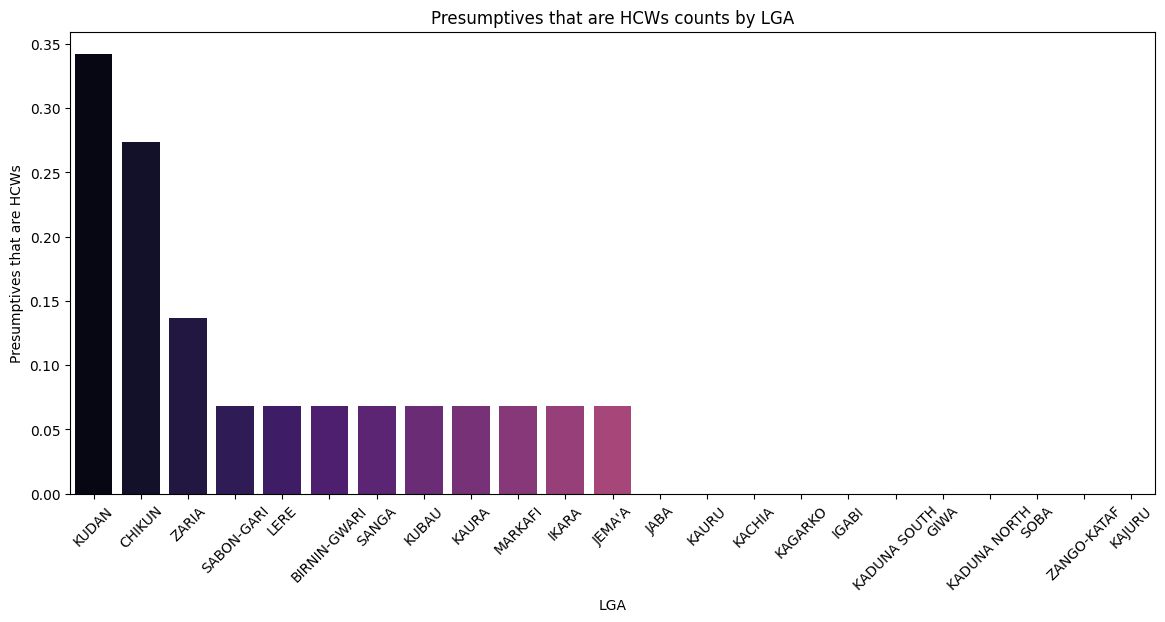

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

In [35]:
plot_cols = [x for x in num_cols if x not in ['Year','Quarter']]
for col in plot_cols:
  plt.figure(figsize=(14,6))
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ) , palette = 'magma' )
  plt.title(f'{col} counts by LGA')
  plt.xticks(rotation=45)
  plt.xlabel("LGA")
  plt.ylabel(col)
  plt.show()

plt.figure(figsize=(16, 6))

**Conclusion:**

1. **Presumptives and Examinations:**
   - **Possible Cause:** Increased public awareness campaigns or targeted testing programs.
   - **Reasoning:** The surge in 2020 Q3 could be a response to a specific health initiative or community outreach.

2. **Total Diagnosed Cases:**
   - **Possible Cause:** Improved diagnostic technologies or expanded testing infrastructure.
   - **Reasoning:** A consistent rise might indicate advancements in testing capabilities, leading to more accurate diagnoses.

3. **HIV Positive Cases:**
   - **Possible Cause:** Disparities in education and limited public awareness.
  - **Reasoning:** The persistent challenges in the education system and lower awareness levels among certain demographics might contribute to higher HIV positive cases. Improving education and launching targeted awareness campaigns could be crucial in addressing this issue.

4. **Healthcare Workers (HCWs):**
   - **Possible Cause:** Occupational exposure or increased health screenings among HCWs.
   - **Reasoning:** The presence of HCWs among presumptives may reflect proactive health monitoring or targeted workplace testing.

These speculative reasons offer insights into potential factors contributing to the observed trends. Further investigation and contextual information would provide a more accurate understanding.

**4] Analyze the trend of each feature by LGA. This analysis is helpful in understanding the impact of features on different LGAs, revealing which areas are more affected by specific features.**

In [36]:
df.columns

Index(['Year', 'Quarter', 'LGA', 'Total number of presumptives',
       'Presumptive DS-TB', 'Presumptive DR-TB', 'Examined for diagnosis',
       'Total diagnosed', 'Rifampicin resistant', 'HIV positive',
       'HIV negative', 'HIV unknown', 'Presumptives that are HCWs',
       'Year_Quarter'],
      dtype='object')

In [37]:
columns_to_line = [ 'Total number of presumptives', 'Presumptive DS-TB','Presumptive DR-TB', 'Examined for diagnosis', 'Total diagnosed','HIV positive', 'HIV negative']

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
def line_plot(col):

  grouped_data = df.groupby(['Year_Quarter', 'LGA'])[col].sum().reset_index()

  plt.figure(figsize=(16,6))
  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)

  plt.xlabel('Year_Quarter')
  plt.xticks(df['Year_Quarter'])
  plt.ylabel(col)
  plt.title(f'Increase in {col} by LGA and Year_Quarter')
  plt.legend(title='LGA', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
  plt.show()


<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


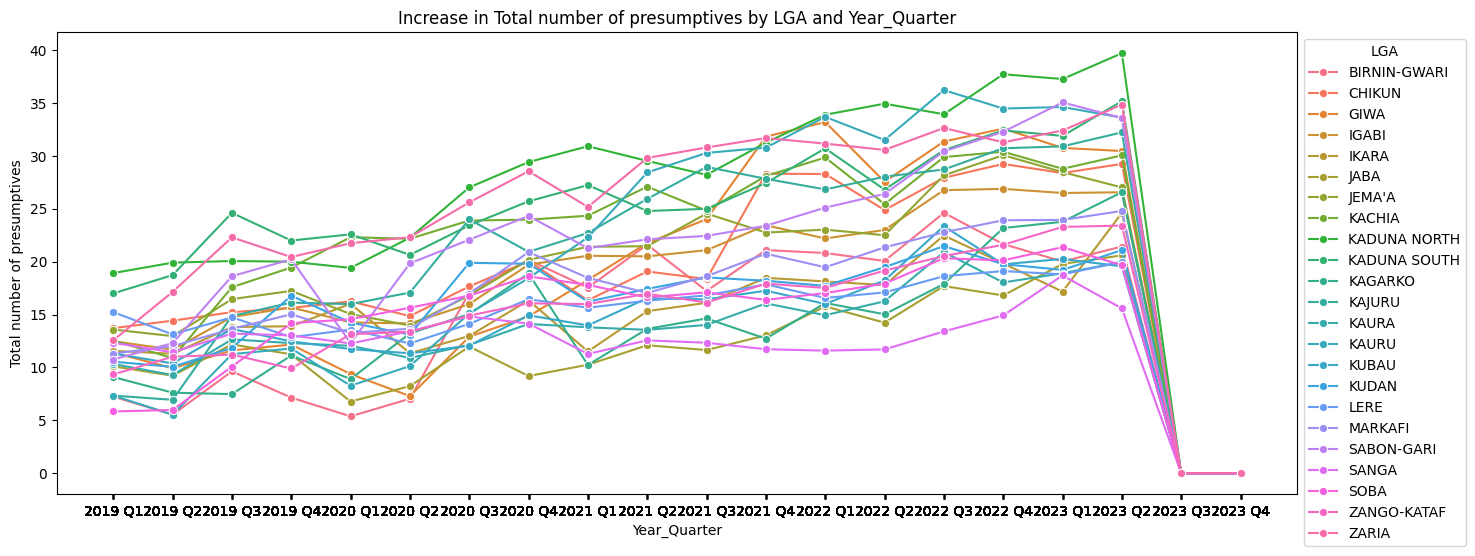

<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


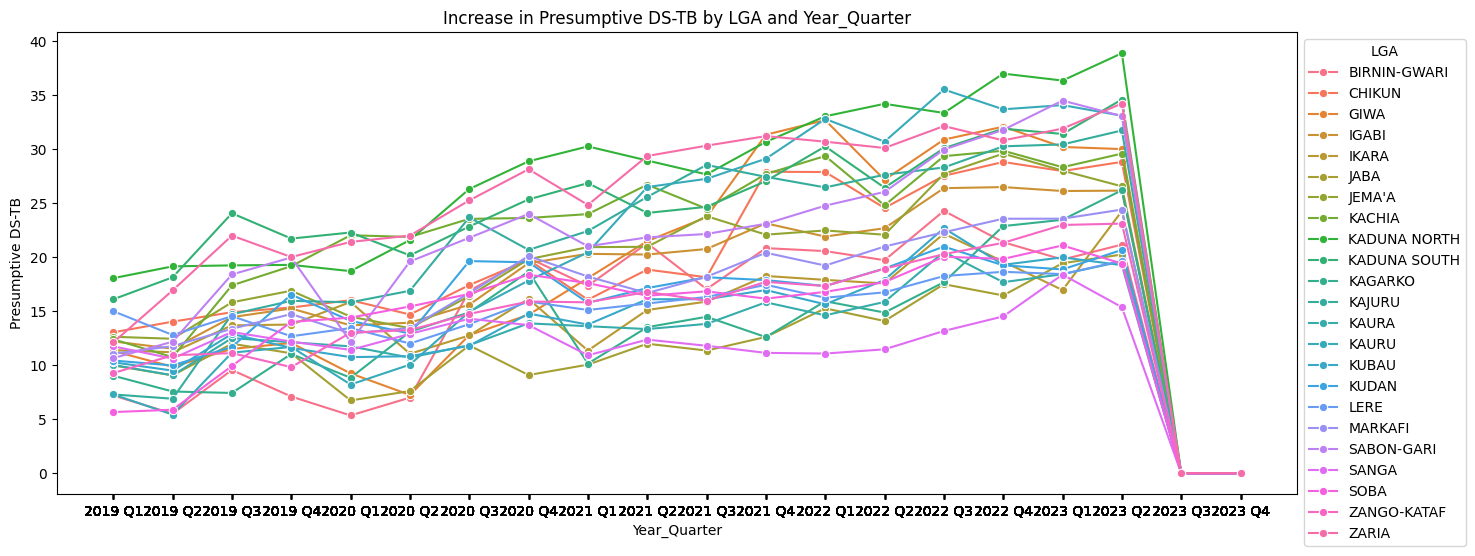

<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


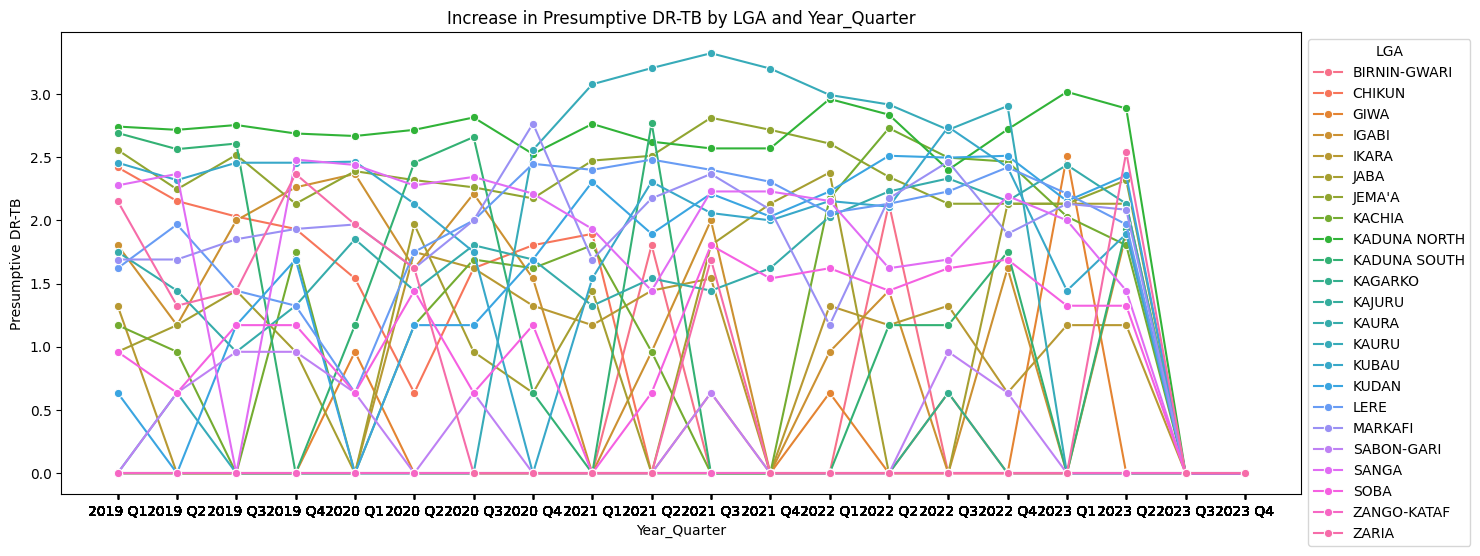

<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


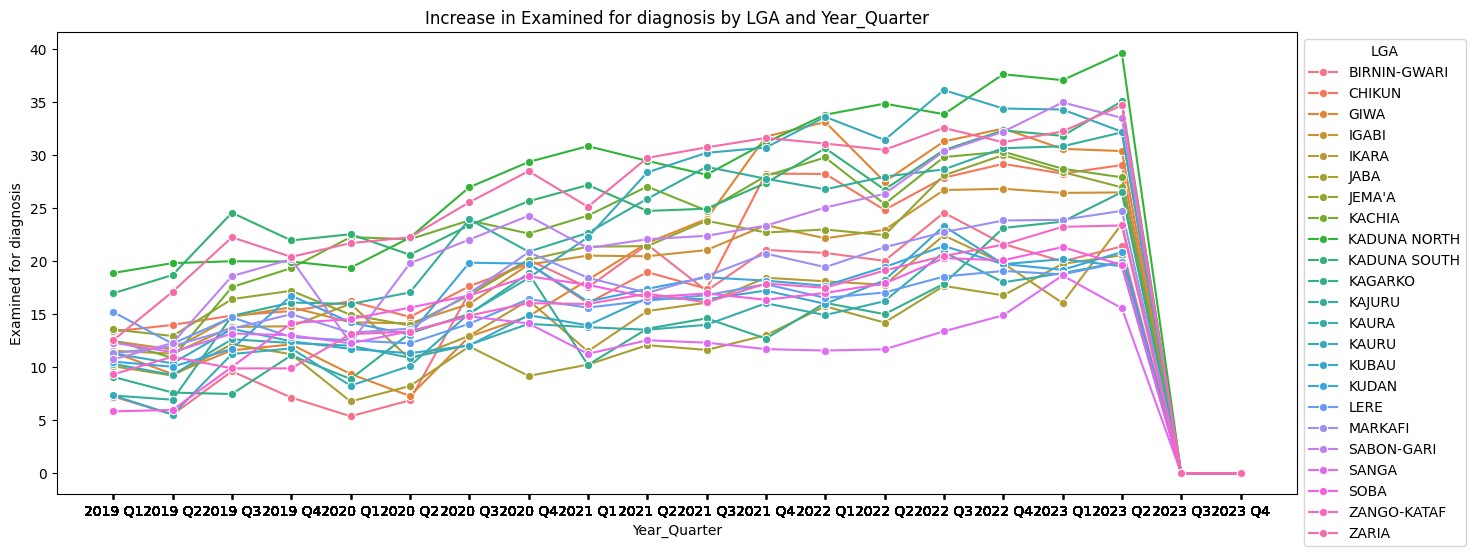

<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


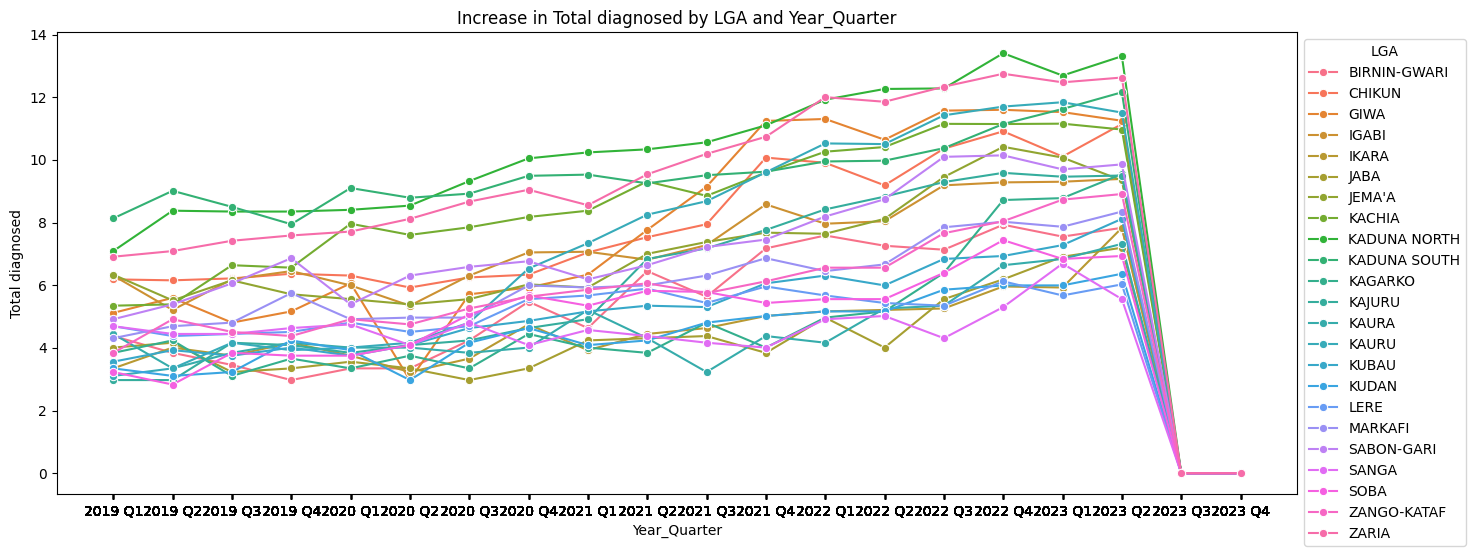

<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


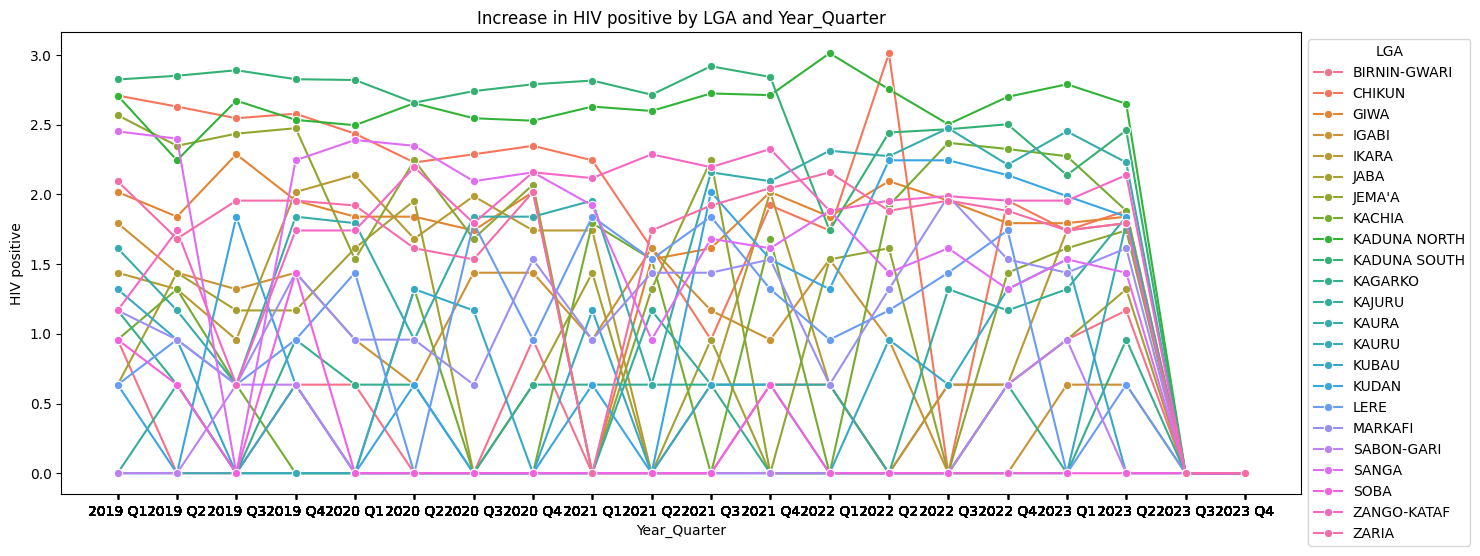

<ipython-input-38-166820668a22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year_Quarter', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


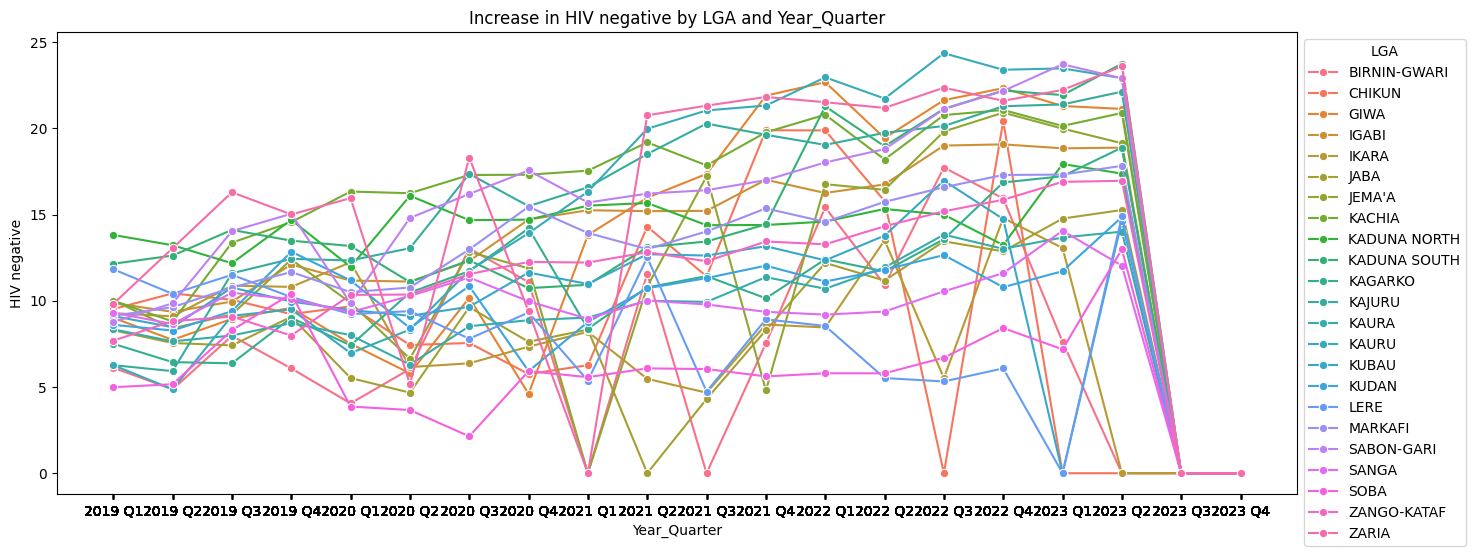

In [39]:
for col in columns_to_line:
    line_plot(col)

**5] Examine the correlation of each column with the total diagnosed cases.**

In [40]:
# numerical columns corelation to total diagnosed
columns_for_correlation = ['Total number of presumptives',
       'Presumptive DS-TB', 'Presumptive DR-TB', 'Examined for diagnosis',
       'Rifampicin resistant', 'HIV positive',
       'HIV negative', 'HIV unknown', 'Presumptives that are HCWs']

In [41]:
# scatter plot for correlation
def scatter_plot(col):
  plt.figure(figsize=(10,6))
  sns.scatterplot(x = col , y='Total diagnosed' , data = df)
  plt.xlabel(col)
  plt.ylabel('Total diagnosed')
  plt.title(f'Correlation of {col} with Total diagnosed')
  plt.show()

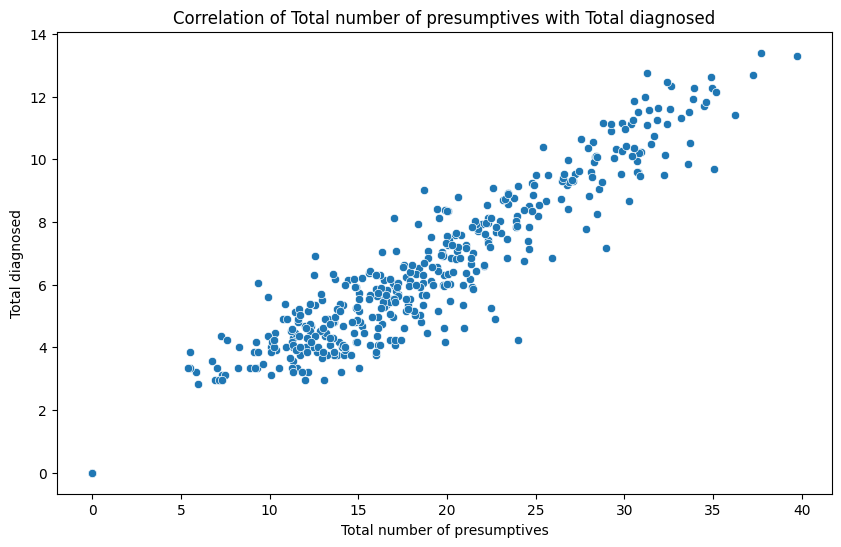

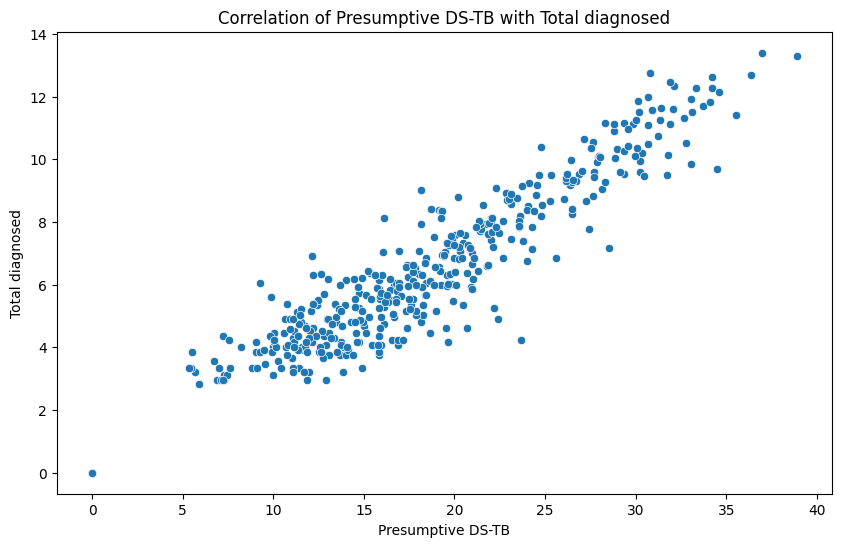

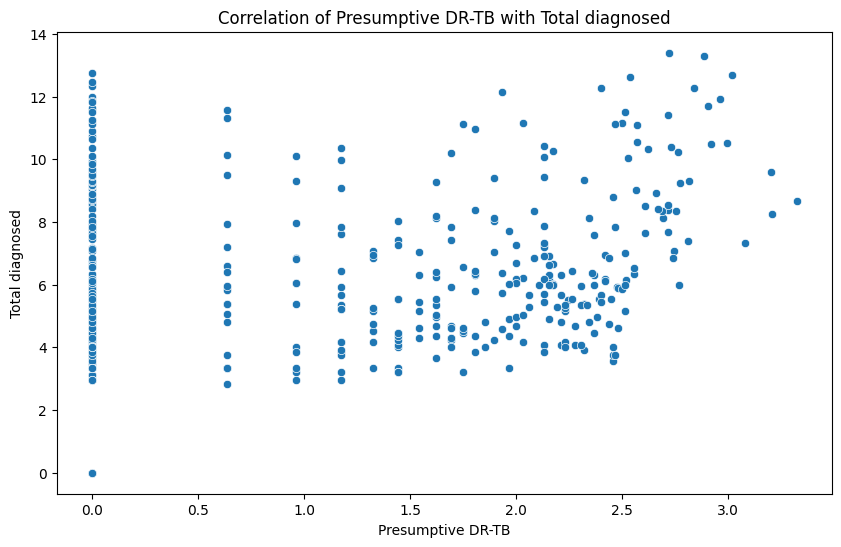

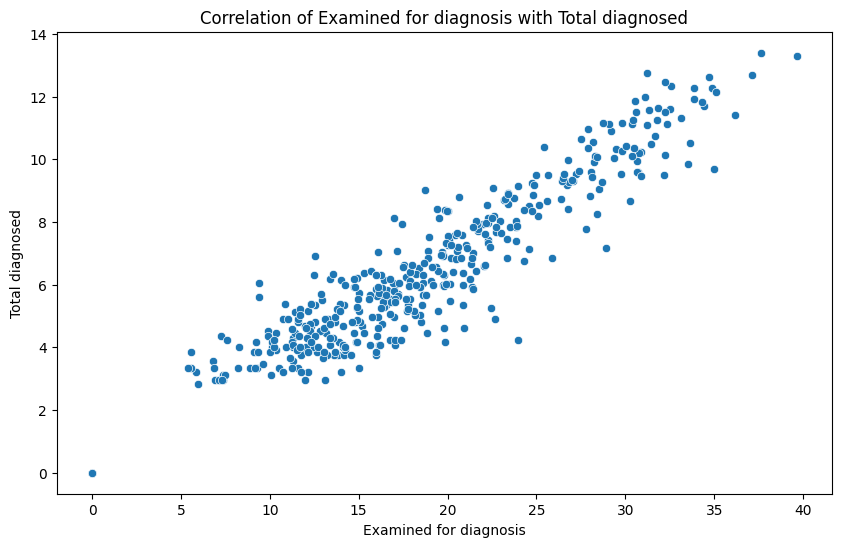

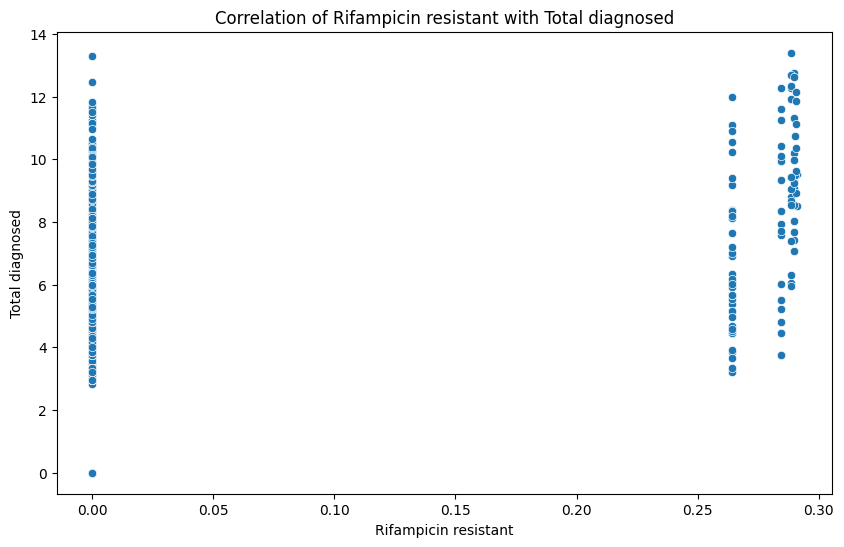

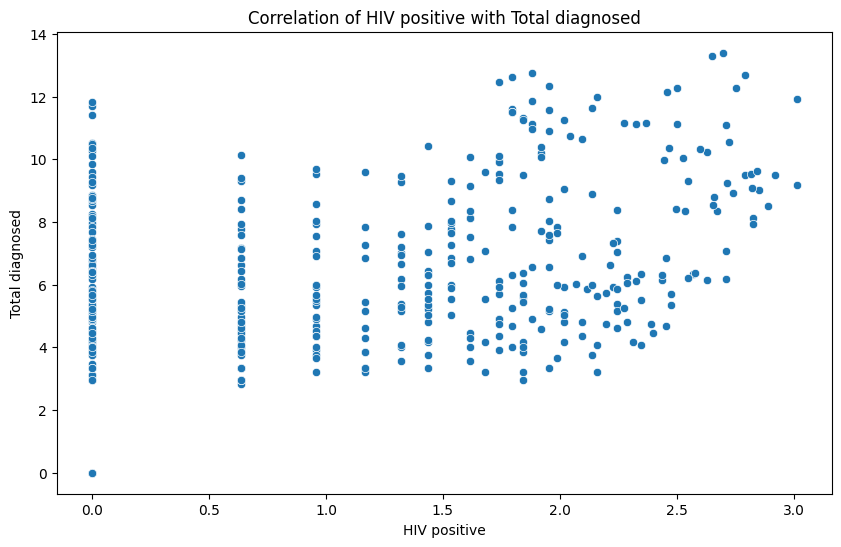

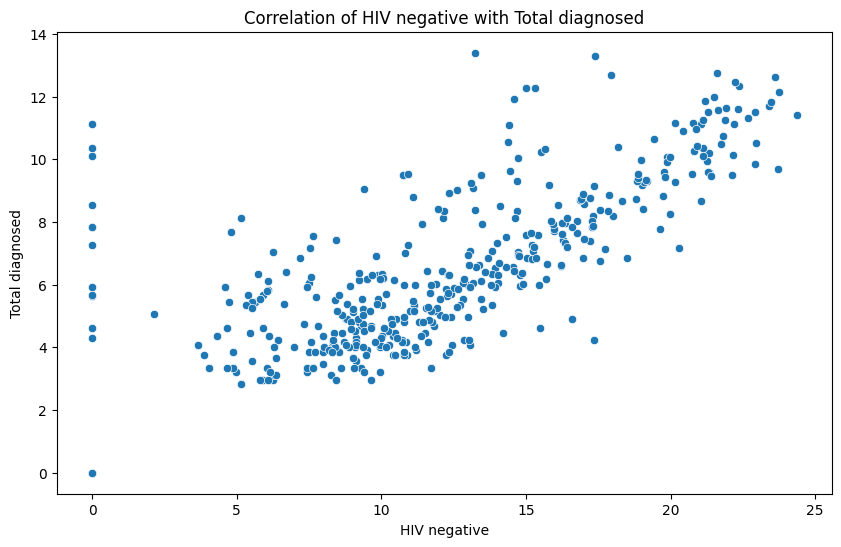

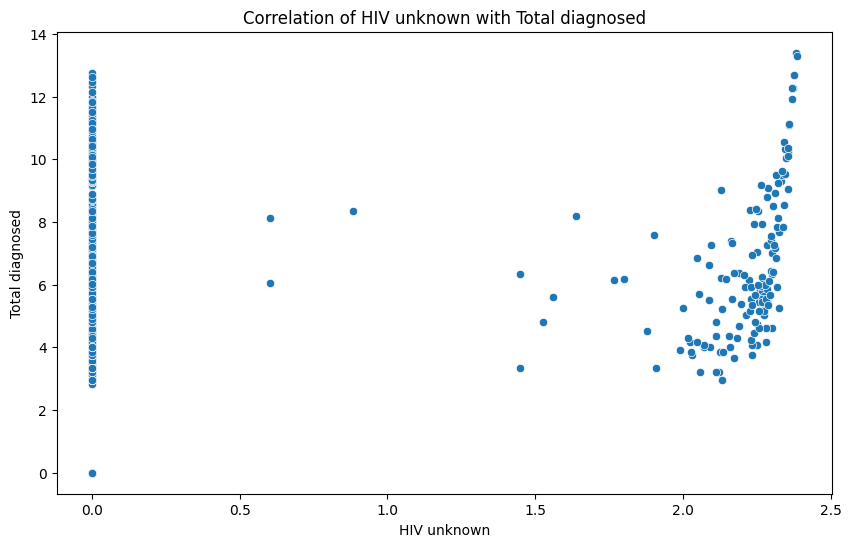

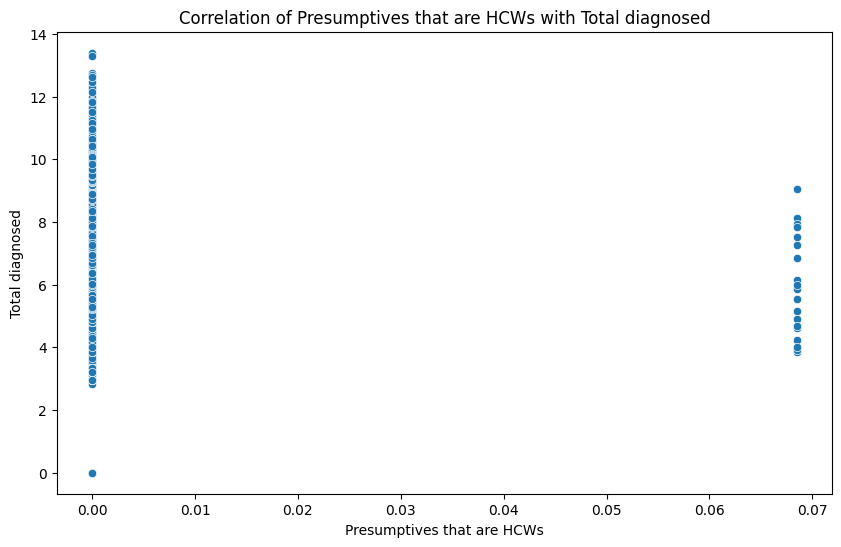

In [42]:
for col in columns_for_correlation:
  scatter_plot(col)

###**C] Multivariate analysis**

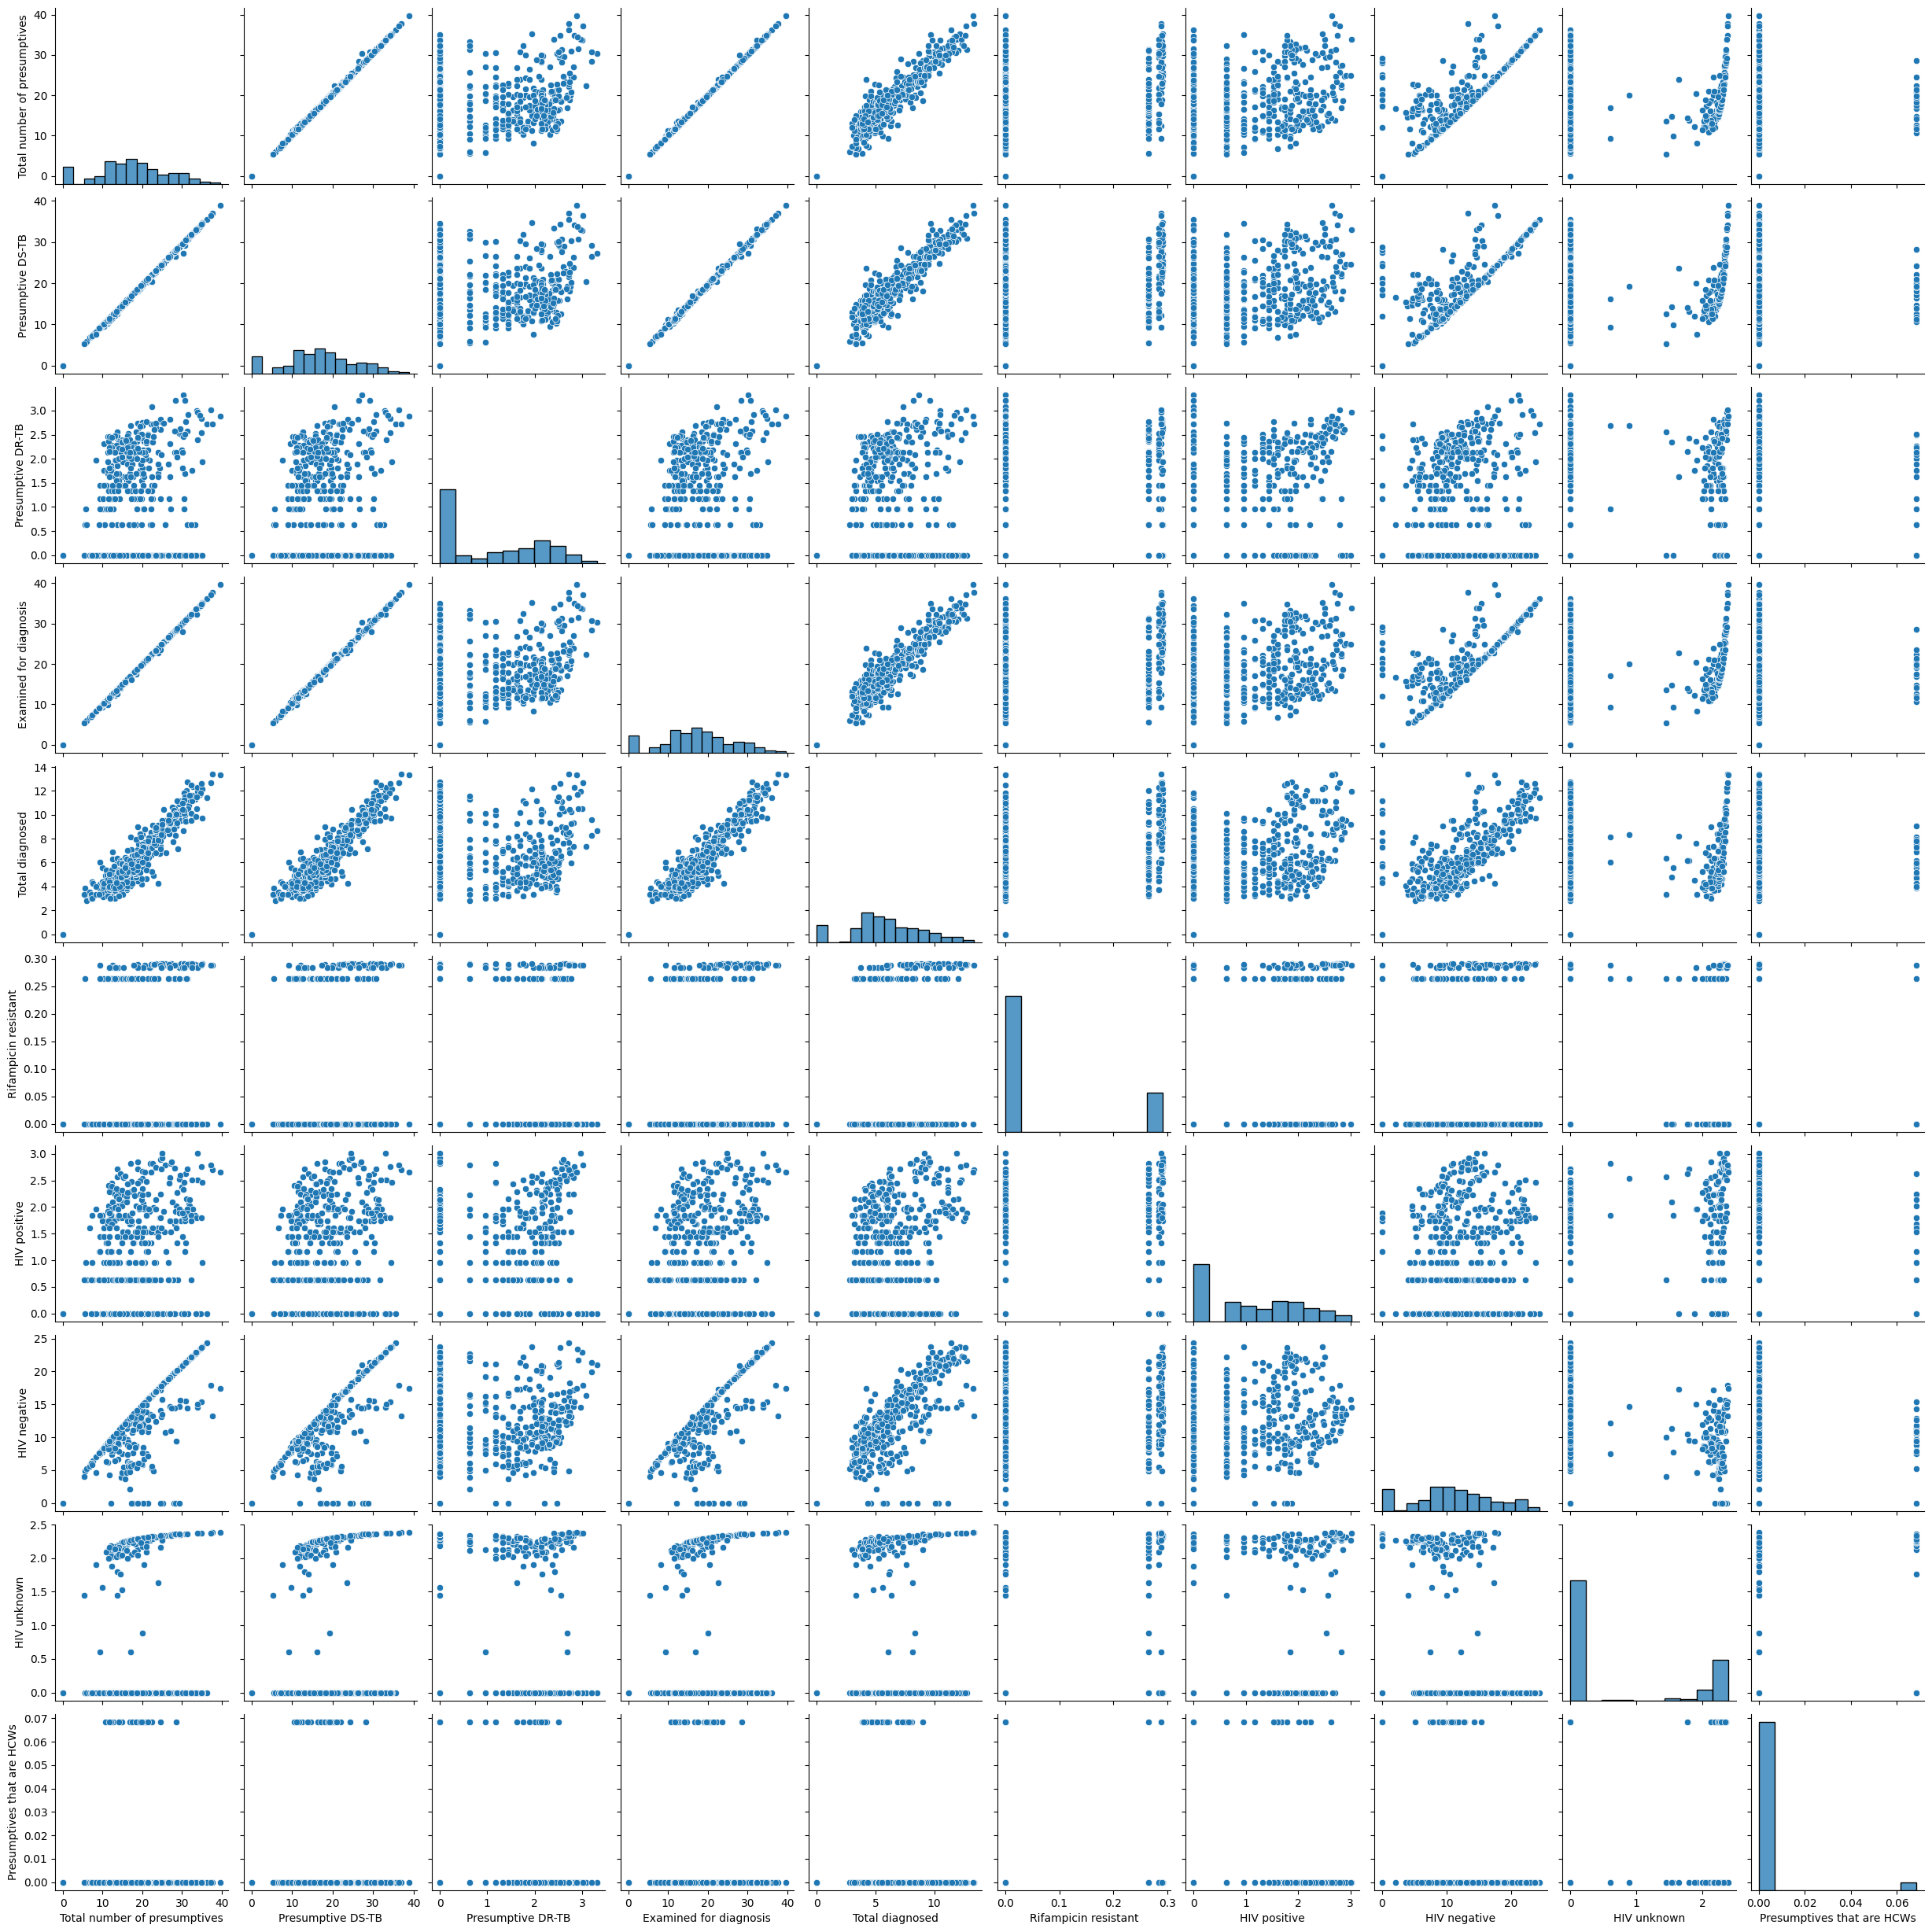

In [43]:
scatter_plot_cols = [col for col in num_cols if col not in ['Year','Quarter']]
sns.pairplot(df[scatter_plot_cols])
plt.show()

**Conclusion**


**Key Observations:**

* **Geographic Distribution:**  TB cases appear to be concentrated in several LGAs, including Kaduna North, Zaria, Kaduna South, Kachia, Sabon Gari, Kauru, Kajuru, and Giwa.
* **HIV and TB Co-infection:**  HIV positive cases are found more frequently in Kaduna South, Kaduna North, and Chikun, while a high number of unknown HIV cases exist in Kaduna North. This suggests a potential need for integrated TB and HIV control strategies in these areas.
* **Drug-Resistant TB:**  Rifampicin resistance, a marker of DR-TB, is present in Kaduna South, Zaria, and Kaduna North. This highlights the importance of measures to curb the emergence of DR-TB.
* **Diagnosis Rates:**  Kaduna North appears to have a higher number of individuals examined for TB diagnosis, potentially indicating more active screening efforts or higher case burden.

**Overall:**

Kaduna State faces a significant challenge with TB, with variations in prevalence, co-infection rates, and drug resistance across different LGAs.

**Recommendations:**

* Public health efforts should prioritize TB screening, diagnosis, and treatment programs in high-burden LGAs (Kaduna North, Zaria, Kaduna South).
* Interventions to reduce DR-TB should be implemented, focusing on areas with identified Rifampicin resistance cases.
* Integrating TB control with HIV testing and treatment services, particularly in LGAs with high HIV prevalence or unknown HIV status among TB cases, is crucial.
* Strengthening public health education campaigns to raise awareness about TB symptoms and encourage early testing in all LGAs is important.

**Data Considerations:**

* It's important to acknowledge that this analysis is based on your findings from potentially limited data.
* Access to more comprehensive data, including specific timeframes and potentially missing details on other LGAs,  could provide a more complete picture of the situation.

**Further Analysis:**

* If possible, obtain data covering a specific timeframe to analyze trends in TB cases, diagnosis rates, and drug resistance.
* Explore potential risk factors associated with TB in different LGAs (e.g., socioeconomic factors, access to healthcare).

By implementing these recommendations and seeking more comprehensive data, Kaduna State can develop more effective strategies to combat TB and improve public health outcomes for its residents.


##**5] Data Processing**

**1] Apply one hot encoding on LGA for categorisation**

In [44]:
# Now I have to drop one LGA from data to remove multicollinearity
# for this I am going to check which LGA has least count of total diagnosed cases
total_diagnosed_lga = df.groupby('LGA')['Total diagnosed'].sum()
total_diagnosed_lga.sort_values()

LGA
JABA             79.560515
KUDAN            82.301871
IKARA            84.029574
KAURA            84.355019
SANGA            84.856072
KAGARKO          89.964265
SOBA             93.327168
LERE             94.815804
KUBAU            95.918894
BIRNIN-GWARI    100.234101
ZANGO-KATAF     108.443451
MARKAFI         110.686377
KAJURU          112.775276
JEMA'A          129.270415
IGABI           131.753243
SABON-GARI      132.498366
KAURU           135.426750
GIWA            143.725365
CHIKUN          143.947851
KACHIA          156.748646
KADUNA SOUTH    173.027274
ZARIA           175.607256
KADUNA NORTH    186.582860
Name: Total diagnosed, dtype: float64

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse= False)
# created an array using one hot encoder
one_hot_encoded = encoder.fit_transform(df[['LGA']])
# convert array to df
one_hot_df = pd.DataFrame(one_hot_encoded , columns = encoder.get_feature_names_out(['LGA']))

df = pd.concat([df , one_hot_df] , axis = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
# check data after onehot encoding
df.head()

Year   Quarter           LGA  Total number of presumptives  \
0  307.286932  0.882548  BIRNIN-GWARI                      7.243992   
1  307.286932  0.882548        CHIKUN                     13.716220   
2  307.286932  0.882548          GIWA                     11.416294   
3  307.286932  0.882548         IGABI                     12.481616   
4  307.286932  0.882548         IKARA                     11.570863   

   Presumptive DS-TB  Presumptive DR-TB  Examined for diagnosis  \
0           7.198555           0.000000                7.239175   
1          13.044699           2.420850               13.379357   
2          11.319267           0.000000               11.405996   
3          12.207808           1.804418               12.469708   
4          11.396025           1.325458               11.560336   

   Total diagnosed  Rifampicin resistant  HIV positive  ...  LGA_KAURU  \
0         4.377802              0.000000      0.958094  ...        0.0   
1         6.186405              0.000000      2.709184  ...        0.0   
2         5.116355              0.264056      2.017192  ...        0.0   
3         6.307134              0.288429      1.793703  ...        0.0   
4         3.345679              0.000000      1.438138  ...        0.0   

   LGA_KUBAU  LGA_KUDAN LGA_LERE  LGA_MARKAFI  LGA_SABON-GARI  LGA_SANGA  \
0        0.0        0.0      0.0          0.0             0.0        0.0   
1        0.0        0.0      0.0          0.0             0.0        0.0   
2        0.0        0.0      0.0          0.0             0.0        0.0   
3        0.0        0.0      0.0          0.0             0.0        0.0   
4        0.0        0.0      0.0          0.0             0.0        0.0   

   LGA_SOBA  LGA_ZANGO-KATAF  LGA_ZARIA  
0       0.0              0.0        0.0  
1       0.0              0.0        0.0  
2       0.0              0.0        0.0  
3       0.0              0.0        0.0  
4       0.0              0.0        0.0  

[5 rows x 37 columns]

as seen in above as JABA has least count of Total diagnosed as 576 so I am going to remove it to reduce multicolinearity after One Hot Encoding

In [47]:
df.drop(columns = ['LGA','LGA_JABA','Year_Quarter'], inplace = True)

In [48]:
df.columns

Index(['Year', 'Quarter', 'Total number of presumptives', 'Presumptive DS-TB',
       'Presumptive DR-TB', 'Examined for diagnosis', 'Total diagnosed',
       'Rifampicin resistant', 'HIV positive', 'HIV negative', 'HIV unknown',
       'Presumptives that are HCWs', 'LGA_BIRNIN-GWARI', 'LGA_CHIKUN',
       'LGA_GIWA', 'LGA_IGABI', 'LGA_IKARA', 'LGA_JEMA'A', 'LGA_KACHIA',
       'LGA_KADUNA NORTH', 'LGA_KADUNA SOUTH', 'LGA_KAGARKO', 'LGA_KAJURU',
       'LGA_KAURA', 'LGA_KAURU', 'LGA_KUBAU', 'LGA_KUDAN', 'LGA_LERE',
       'LGA_MARKAFI', 'LGA_SABON-GARI', 'LGA_SANGA', 'LGA_SOBA',
       'LGA_ZANGO-KATAF', 'LGA_ZARIA'],
      dtype='object')

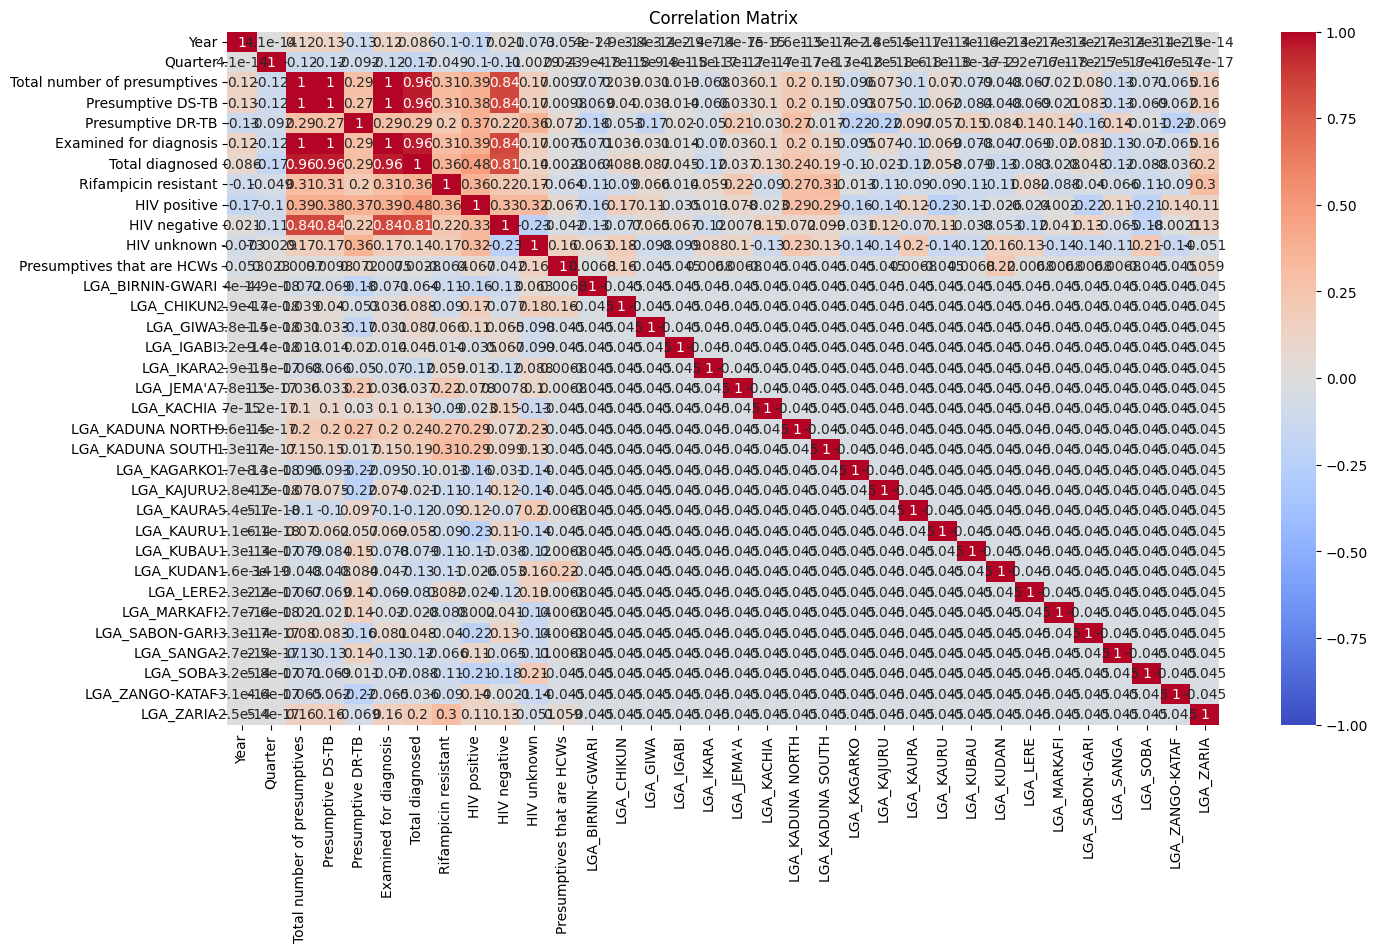

In [49]:
# check multi collinearity for each feature
correlation_matrix = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix , annot = True, cmap = 'coolwarm' , vmin = -1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**In above there are 4 features shown high multicollinearity. But I cant remove or feature engineering them as it required domain knowledge. So I am going to use PCA (Principal Component Analysis)**

In [50]:
df.columns

Index(['Year', 'Quarter', 'Total number of presumptives', 'Presumptive DS-TB',
       'Presumptive DR-TB', 'Examined for diagnosis', 'Total diagnosed',
       'Rifampicin resistant', 'HIV positive', 'HIV negative', 'HIV unknown',
       'Presumptives that are HCWs', 'LGA_BIRNIN-GWARI', 'LGA_CHIKUN',
       'LGA_GIWA', 'LGA_IGABI', 'LGA_IKARA', 'LGA_JEMA'A', 'LGA_KACHIA',
       'LGA_KADUNA NORTH', 'LGA_KADUNA SOUTH', 'LGA_KAGARKO', 'LGA_KAJURU',
       'LGA_KAURA', 'LGA_KAURU', 'LGA_KUBAU', 'LGA_KUDAN', 'LGA_LERE',
       'LGA_MARKAFI', 'LGA_SABON-GARI', 'LGA_SANGA', 'LGA_SOBA',
       'LGA_ZANGO-KATAF', 'LGA_ZARIA'],
      dtype='object')

**2] Check most Important Features**

In [51]:
x = df.drop('Total diagnosed' , axis = 1)
y = df['Total diagnosed']

In [52]:
model = RandomForestRegressor()
model.fit(x , y)
best_features = x.columns

best_scores_df = pd.DataFrame(model.feature_importances_)
best_features_df = pd.DataFrame(best_features)

best_important_features_df = pd.concat([best_features_df , best_scores_df] , axis = 1)
best_important_features_df.columns = ['Features','Scores']
best_important_features_df.sort_values(by = 'Scores' , ascending = False)

Features    Scores
2   Total number of presumptives  0.388627
5         Examined for diagnosis  0.351951
3              Presumptive DS-TB  0.191808
7                   HIV positive  0.015381
8                   HIV negative  0.009927
21                    LGA_KAJURU  0.007284
0                           Year  0.006404
4              Presumptive DR-TB  0.005350
25                     LGA_KUDAN  0.003136
1                        Quarter  0.002431
9                    HIV unknown  0.002191
6           Rifampicin resistant  0.002079
28                LGA_SABON-GARI  0.002015
32                     LGA_ZARIA  0.001333
15                     LGA_IKARA  0.001253
12                    LGA_CHIKUN  0.001122
13                      LGA_GIWA  0.001099
14                     LGA_IGABI  0.000976
19              LGA_KADUNA SOUTH  0.000766
20                   LGA_KAGARKO  0.000622
22                     LGA_KAURA  0.000541
10    Presumptives that are HCWs  0.000500
17                    LGA_KACHIA  0.000477
11              LGA_BIRNIN-GWARI  0.000457
16                    LGA_JEMA'A  0.000360
24                     LGA_KUBAU  0.000326
29                     LGA_SANGA  0.000319
31               LGA_ZANGO-KATAF  0.000270
18              LGA_KADUNA NORTH  0.000267
27                   LGA_MARKAFI  0.000222
26                      LGA_LERE  0.000180
23                     LGA_KAURU  0.000176
30                      LGA_SOBA  0.000151

In [53]:
pip install shap

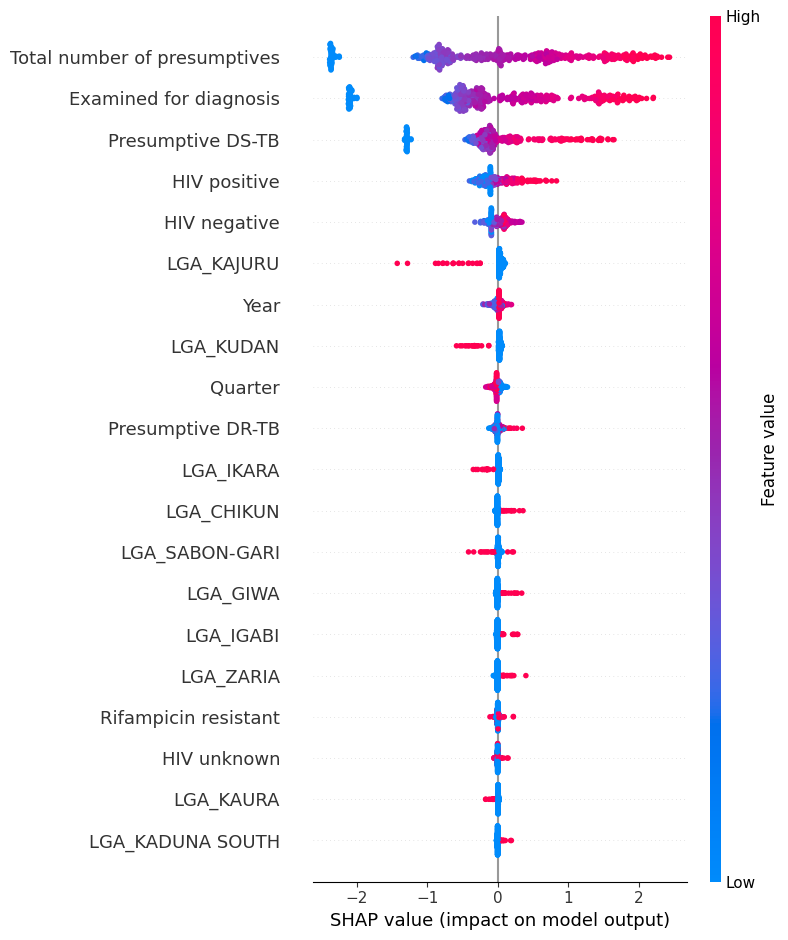

In [56]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x)

# Summary plot
shap.summary_plot(shap_values, x)


##**6] Model Designing**

**I am going to apply PCA on our data to reduce multicollinearity**

In [57]:
# Split the data
X = df.drop('Total diagnosed' , axis = 1)
y = df['Total diagnosed']

In [58]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
x_train , x_test , y_train , y_test = train_test_split( X_scaled , y , test_size = 0.2 , random_state = 42)

###**Applying regularization before PCA**

**1] Lasso model**

In [60]:

model = Lasso()

alpha_params = {'alpha':[ 1 ,5,7 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 1}
rmse train: 1.3474618661851552
rmse test: 1.32089414451021
r2 train: 0.8054646328212622
r2 test: 0.8198272943064463


**2] Ridge Model**

In [61]:

model = Ridge()

alpha_params = {'alpha':[ 0.1 , 1 ,5,7, 10 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 0.1}
rmse train: 0.5993984020481042
rmse test: 0.6053242701901731
r2 train: 0.9615056700881287
r2 test: 0.9621619153251159


**3] Elastic Net**

In [62]:

model = ElasticNet()

alpha_params = {'alpha':[ 0.1 , 1 ,5,7, 10 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 0.1}
rmse train: 0.6466854932087255
rmse test: 0.6298492948039414
r2 train: 0.9551923837809515
r2 test: 0.9590337448630408


**After performing all regulariazation techniques Ridge Regression model shown balanced fit on the data with 95% prediction scores**

###**Applying Principal Component Analysis (PCA)**

In [63]:
pca = PCA()
pca.fit(X_scaled)

PCA()

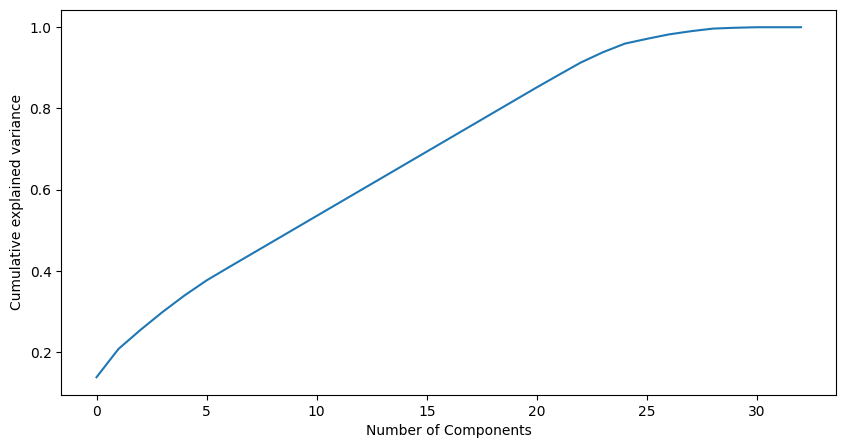

In [64]:
# plot the variance of each component to get best number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [65]:
best_n_components = np.argmax(cumulative_variance_ratio >=0.95) + 1
print("Best numbers of components are:", best_n_components)

Best numbers of components are: 25


In [66]:
# we got number of components = 24 for pca
pca_model = PCA(n_components = best_n_components)
x_pca = pca_model.fit_transform(X_scaled)

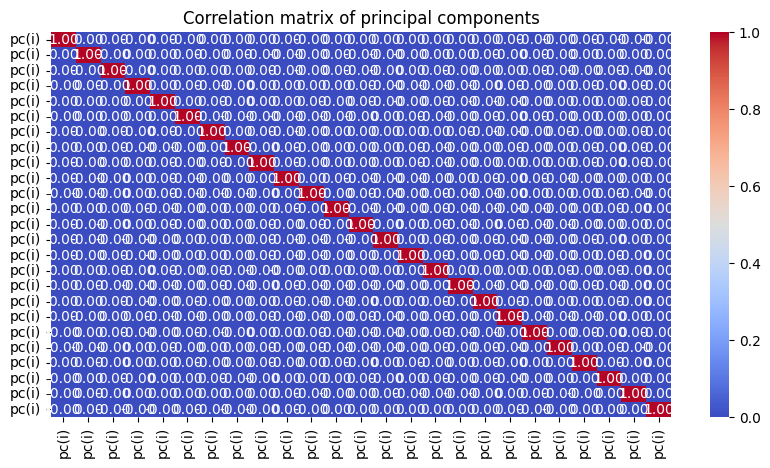

In [67]:
pca_comp = pd.DataFrame(x_pca , columns = [f'pc(i)' for i in range(1 , x_pca.shape[1] + 1)])

correlation_matrix = pca_comp.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix , annot = True , cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of principal components')
plt.show()

In [68]:
# check multicolinearity
explained_var_ratio = pca_model.explained_variance_ratio_

eigen_values = pca_model.explained_variance_

In [69]:
explained_var_ratio

array([0.13777941, 0.06969807, 0.04701137, 0.04398548, 0.04081797,
       0.03698496, 0.03211947, 0.03168197, 0.0316808 , 0.03168044,
       0.03168044, 0.03168044, 0.03168044, 0.03168044, 0.03168044,
       0.03168044, 0.03168044, 0.03168044, 0.03168044, 0.03168044,
       0.03168044, 0.03077746, 0.03045016, 0.02523625, 0.02124922])

In [70]:
eigen_values

array([4.55662616, 2.30504721, 1.55475504, 1.45468315, 1.3499278 ,
       1.22316276, 1.06225176, 1.04778275, 1.04774405, 1.04773222,
       1.04773222, 1.04773222, 1.04773222, 1.04773222, 1.04773222,
       1.04773222, 1.04773222, 1.04773222, 1.04773222, 1.04773222,
       1.04773222, 1.01786907, 1.00704444, 0.83461078, 0.70275185])

In [71]:
# shape after PCA
x_pca.shape

(460, 25)

**Split the train and validation data**

In [72]:
x_train , x_test , y_train , y_test = train_test_split( x_pca , y , test_size = 0.2 , random_state = 42 )

###**Applying Regularization after PCA**

**1] Lasso model**

In [73]:

model = Lasso()

alpha_params = {'alpha':[ 1 ,5,7 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 1}
rmse train: 1.082548152297968
rmse test: 1.039888566124437
r2 train: 0.8744374726655781
r2 test: 0.88833255571191


**2] Ridge Model**

In [74]:

model = Ridge()

alpha_params = {'alpha':[ 0.1 , 1 ,5,7, 10 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 10}
rmse train: 0.6455124980213119
rmse test: 0.6613096945992242
r2 train: 0.9553547856018254
r2 test: 0.9548390832553868


**3] Elastic Net**

In [75]:

model = ElasticNet()

alpha_params = {'alpha':[ 0.1 , 1 ,5,7, 10 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 0.1}
rmse train: 0.6842291623302388
rmse test: 0.6652556842999859
r2 train: 0.949838702368933
r2 test: 0.9542985311332053


###**Let's test different Non Linear regression models**

In [ ]:


# Ignore all warnings
warnings.filterwarnings("ignore")


def model_fitting(model_dict, x_train, y_train, x_test, y_test):
    best_models = {}
    best_params_dict = {}
    best_mse = np.inf  # Change to positive infinity

    for model_name, (model, param_grid) in model_dict.items():
        print(f'{model_name}:\n')

        k_fold = KFold( n_splits = 5 , shuffle = True , random_state= 42)
        grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv= k_fold)
        grid_search.fit(x_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        best_model.fit(x_train, y_train)

        y_train_pred = best_model.predict(x_train)
        mse = mean_squared_error(y_train , y_train_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train , y_train_pred)



        y_pred = best_model.predict(x_test)
        mset = mean_squared_error(y_test, y_pred)
        rmset = np.sqrt(mset)
        r2t = r2_score(y_test, y_pred)

        print('Best params:', best_params)
        print('RMSE train',rmse)
        print('RMSE test:', rmset)
        print("R2 train", r2)
        print('R^2:', r2t)
        print()

        if mse < best_mse:
            best_mse = mse
            best_models[model_name] = best_model
            best_params_dict[model_name] = best_params

    return best_models, best_params_dict


I am going to use AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, DecisionTreeRegressor , KNeighborsRegressor and SVR as this models are does well for less data

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Dictionary of models with hyperparameter lists
models_with_params2 = {
    'AdaBoostRegressor': (AdaBoostRegressor(), {'n_estimators': [85, 100, 115, 150, 200], 'learning_rate': [0.01, 0.1, 0.115, 0.5, 0.6]}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [600, 750, 950], 'learning_rate': [0.1, 0.2, 0.3, 0.5], 'max_depth': [2, 3]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [50, 75, 100, 150], 'max_depth': [5, 7]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [1, 2, 3, 5, 7]}),
    'SVR': (SVR(), {'C': [1, 10, 11, 12, 14], 'kernel': ['linear', 'rbf']}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': [2, 3, 4, 5]}),
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.8, 0.9, 1.0]}),
    'ExtraTreesRegressor': (ExtraTreesRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]})
}




In [ ]:
best_model , best_param = model_fitting(models_with_params2 , x_train , y_train, x_test , y_test )

AdaBoostRegressor:

Best params: {'learning_rate': 0.6, 'n_estimators': 100}
RMSE train 0.6693537059669431
RMSE test: 0.7674611065963769
R2 train 0.9519960530680972
R^2: 0.9391772962933421

GradientBoostingRegressor:

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 950}
RMSE train 0.01003923139191331
RMSE test: 0.6511835611544519
R2 train 0.9999892014229591
R^2: 0.956211524298856

RandomForestRegressor:

Best params: {'max_depth': 7, 'n_estimators': 150}
RMSE train 0.36310651378382947
RMSE test: 0.6312705180919627
R2 train 0.985873529006224
R^2: 0.9588486596877954

DecisionTreeRegressor:

Best params: {'max_depth': 5}
RMSE train 0.6576718021701093
RMSE test: 0.8543560304181367
R2 train 0.9536570104870127
R^2: 0.9246244057640179

SVR:

Best params: {'C': 10, 'kernel': 'rbf'}
RMSE train 0.31098972866598235
RMSE test: 0.8261772441445503
R2 train 0.9896376634492958
R^2: 0.9295145578892051

KNeighborsRegressor:

Best params: {'n_neighbors': 2}
RMSE train 0.59682662195567

###Final Model

In [89]:
# Among all the models Ridge Regressor gave best performance with balnaced fit
ridge_model = Ridge()

alpha_params = {'alpha':[ 0.1 , 1 ,5,7, 10 ]}

k_fold = KFold( n_splits = 5 , shuffle = True , random_state = 42)

grid_search = GridSearchCV( ridge_model , alpha_params , cv = k_fold )

grid_search.fit( x_train , y_train)

y_train_pred = grid_search.predict( x_train)
mse_train = mean_squared_error( y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score( y_train , y_train_pred )

y_test_pred = grid_search.predict( x_test)
mse_test = mean_squared_error( y_test , y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score( y_test ,y_test_pred)

print(grid_search.best_params_)
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)
print('r2 train:',r2_train)
print('r2 test:',r2_test)

{'alpha': 1}
rmse train: 0.6000372294786671
rmse test: 0.5984543501984727
r2 train: 0.961423573311695
r2 test: 0.9630159023565451


The above differences betn (rmse of train and test data) and r2 scores are less shows that the model is more balanced fit for both train and test data.

###PIKL Files for deployment

* 1] As per above all i used standard scaler to scale the models

* 2] used PCA to treat multicolinearity
* 3] As Model performed well on train and Test data and more precie to balance, it will well precisely predicts our input data

In [100]:
# 1] standard scaler transform pikl
import pickle as pkl

# Save the scaler object
with open(path+'scaler.pkl', 'wb') as file:
    pkl.dump(scaler, file)

In [101]:
# 2] PCA pikl
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
import joblib

# Assuming ridge_model is actually a PCA model
# Save the PCA model
joblib.dump(pca_model, path+'pca_model.joblib')

['/content/drive/MyDrive/Omdena/My Contribution/Processed Data/block1a_processed.csvpca_model.joblib']

In [102]:
# 3] Save the Gradient Boost model
joblib.dump(ridge_model, path+'ridge_model.joblib')

['/content/drive/MyDrive/Omdena/My Contribution/Processed Data/block1a_processed.csvridge_model.joblib']

The Ridge Regression model with the chosen hyperparameter (alpha = 0.1) exhibits good performance based on the provided metrics:

1. **RMSE (Root Mean Squared Error):**
   - Training Set: 0.5994
   - Test Set: 0.6053

2. **R-squared (R2) Score:**
   - Training Set: 0.9615
   - Test Set: 0.9622

**Interpretation:**
- The RMSE values are relatively low, indicating that the model's predictions are close to the actual values, both on the training and test sets.
- The high R-squared values (close to 1) suggest that a significant proportion of the variance in the target variable is captured by the model.

**Conclusion:**
The Ridge Regression model, with the selected hyperparameter, demonstrates strong predictive performance on both the training and test datasets. The model seems to generalize well, as indicated by the comparable performance on the training and test sets, minimizing the risk of overfitting.

##**Overall Conclusion on Project**



Based on the analyzed data for presumptive TB cases, diagnosed cases, HIV status, and healthcare worker involvement, here's a comprehensive conclusion incorporating key observations and recommendations:

**Presumptive Cases and Examinations:**

* I observed a general upward trend in presumptive cases and examinations for diagnosis, suggesting increased vigilance or targeted testing initiatives. The surge in 2020 Q3 might be related to a specific public health campaign.

**Diagnosed Cases:**

* The rise in total diagnosed cases potentially indicates improvements in diagnostic technologies or expanded testing infrastructure. A more consistent rise might suggest advancements in testing capabilities leading to more accurate diagnoses.

**HIV Positive Cases:**

* Fluctuations in HIV-positive cases highlight potential disparities in education and limited public awareness. The persistent challenges in HIV education and lower awareness levels in certain demographics may contribute to higher HIV positive cases. Implementing targeted awareness campaigns and improving education could be crucial.

**Healthcare Workers (HCWs):**

* The presence of HCWs among presumptives may reflect proactive health monitoring or targeted workplace testing. Further investigation is needed to confirm the reasons behind this pattern.

**Key Geographic Observations:**

* The data indicates higher TB prevalence in specific LGAs like Kaduna North, Zaria, and Kaduna South.
* A higher frequency of HIV-positive cases is found in Kaduna South, Kaduna North, and Chikun, with a significant number of unknown HIV cases in Kaduna North. This suggests a potential need for integrated TB and HIV control strategies in these areas.
* Rifampicin resistance, a marker of drug-resistant TB (DR-TB), is present in Kaduna South, Zaria, and Kaduna North. This necessitates measures to curb the emergence of DR-TB.
* Kaduna North appears to have a higher number of individuals examined for TB diagnosis, potentially indicating more active screening efforts or a higher case burden.

**Overall Observations:**

* Kaduna State faces a significant challenge with TB, with variations in prevalence, co-infection rates, and drug resistance across different LGAs.

**Recommendations:**

* Public health efforts should prioritize TB screening, diagnosis, and treatment programs in high-burden LGAs (Kaduna North, Zaria, Kaduna South).
* Interventions to reduce DR-TB should be implemented, focusing on areas with identified Rifampicin resistance cases.
* Integrate TB control with HIV testing and treatment services, particularly in LGAs with high HIV prevalence or unknown HIV status among TB cases.
* Strengthen public health education campaigns to raise awareness about TB symptoms and encourage early testing in all LGAs.

**Data Considerations:**

* This analysis is based on potentially limited data. Access to more comprehensive data, including specific timeframes and missing details on other LGAs, could provide a more complete picture.

**Further Analysis (if possible):**

* Obtain data covering a specific timeframe to analyze trends in TB cases, diagnosis rates, and drug resistance.
* Explore potential risk factors associated with TB in different LGAs (e.g., socioeconomic factors, access to healthcare).

By implementing these recommendations and seeking more comprehensive data, Kaduna State can develop more effective strategies to combat TB and improve public health outcomes for its residents.

**Additional Notes:**

* The conclusion acknowledges the limitations of the data and emphasizes the need for more comprehensive information.
* It suggests further analysis to explore potential risk factors and trends.
* The recommendations prioritize public health interventions targeting high-burden areas and address the need for integrated TB and HIV control strategies.

I hope this revised conclusion provides a clear and informative summary of the findings and recommendations!

**I'm thrilled to be involved in this project that contributes to a healthier future for all.**